# Recommender Systems - Mini Challenge FS24

In this minichallenge we will explore a MovieLens dataset and implement several recommender systems and evaluation methods. Subsequently we will optimize these methods and compare the results. 

**Submission deadline:** 5.5.2024 23:59. 

## Guidelines for Implementation and Submission
- Code must be written in Python or R. The versions of all used packages must be given for reproducability.
- We develop numerous algorithms ourselves. Unless explicitly stated otherwise, only the following libraries may be used in Python: numpy, matplotlib, seaborn, pandas. In R only the base package, ggplot2, lattice, dplyr. 
- Follow good coding practices and write modular, reusable code.
- The submitted solution must contain all codes and the results. No code may be outsourced.
- If computation time is too long for productive prototyping and debugging work, it is recommended to reduce the dataset to a fraction of its original. However, final results should be calculated on the full dataset. 
- All plots must be fully labeled (title, axes, labels, colorbar, etc.) so that the plot can be easily understood.
- Each plot should be accompanied by a brief discussion, which explains the plot and captures the key insights that become visible.
- Only fully labeled plots with an accompanying discussion will be assessed.
- The last commit in your fork of the repo before the submission deadline counts as the submission.
- If you would like to submit and have the mini-challenge assessed, please send a short email to the subject expert (moritz.kirschmann@fhnw.ch) within 2 days after submission.
- Please do not delete, duplicate, or move the existing cells. This leads to problems during the correction. However, you may add as many additional cells as you like.

## Exercises

### Exercise 1 - A deep exploration of the dataset (17 points)
We will work with a subset of the MovieLens dataset. This subset is located under ``data/ml-latest-small``. Read the ``README.txt``carefully. 
Open the files. 
Create usefull data representations such as the the *User Item Matrix*.
Perform explorative data analysis. Describe the available data. Did you find duplicates or otherwise bad data? 

Generate lists of
- Top 20 movies by average rating
- Top 20 movies by number of views

Answer: 
- What is the range of the ratings? 
- Which genre has be rated how many times?
- How sparse is the User Rating Matrix?

Plot the following:
- How many users have rated how many movies
- Which rating is given how often on average
- Which rating is given how often on average per genre
- The rating distributions of 10 random movies
- The rating distributions of 3 movies that you have watched
- How many users give which average rating
- How often a movie was rated as a function of average rating
- A heatmap of the User Item Matrix
- A heatmap of the User Item Matrix for the 100 most rated movies for the 50 users with most ratings


In [58]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [59]:
# Dataframes hochladen
links = pd.read_csv("Data/ml-latest-small/links.csv")
movies = pd.read_csv("Data/ml-latest-small/movies.csv")
ratings = pd.read_csv("Data/ml-latest-small/ratings.csv")
tags = pd.read_csv("Data/ml-latest-small/tags.csv")

#### Explorative data analysis

In [60]:
# Links
print(links.head())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [61]:
links.shape

(9742, 3)

In [62]:
# Überprüfung, ob es doppelte Zeilen gibt
doubletten = links.duplicated().any()

if doubletten:
    print("Es gibt doppelte Zeilen im Dataframe.")
else:
    print("Es gibt keine doppelten Zeilen im Dataframe.")

Es gibt keine doppelten Zeilen im Dataframe.


##### Beschreibung des Dataframes Links
Das Datenset besteht aus drei Spalten und 9742 Zeilen. Die erste Spalte heisst movieID und ist ein identifier für die Filme auf der Webseite Movielens, also unter welchem Sublink ich welchen Film finden kann. Die zweite und dritte Spalte ist dasselbe für die Seiten imdb und themoviedb. 
Es gibt keine doppelten Spalten. 

In [63]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [64]:
movies.shape

(9742, 3)

In [65]:
# Eine seperate Spalte mit Jahren machen
movies['year'] = movies['title'].str.extract('\((\d{4})\)')
movies['title'] = movies['title'].str.replace('(\(\d{4}\))', '', regex=True).str.strip()
print(movies.head())

   movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995  


In [66]:
# Überprüfen, ob es doppelte Spalten gibt
doubletten = movies.duplicated().any()

if doubletten:
    print("Es gibt doppelte Zeilen im Dataframe.")
else:
    print("Es gibt keine doppelten Zeilen im Dataframe.")

Es gibt keine doppelten Zeilen im Dataframe.


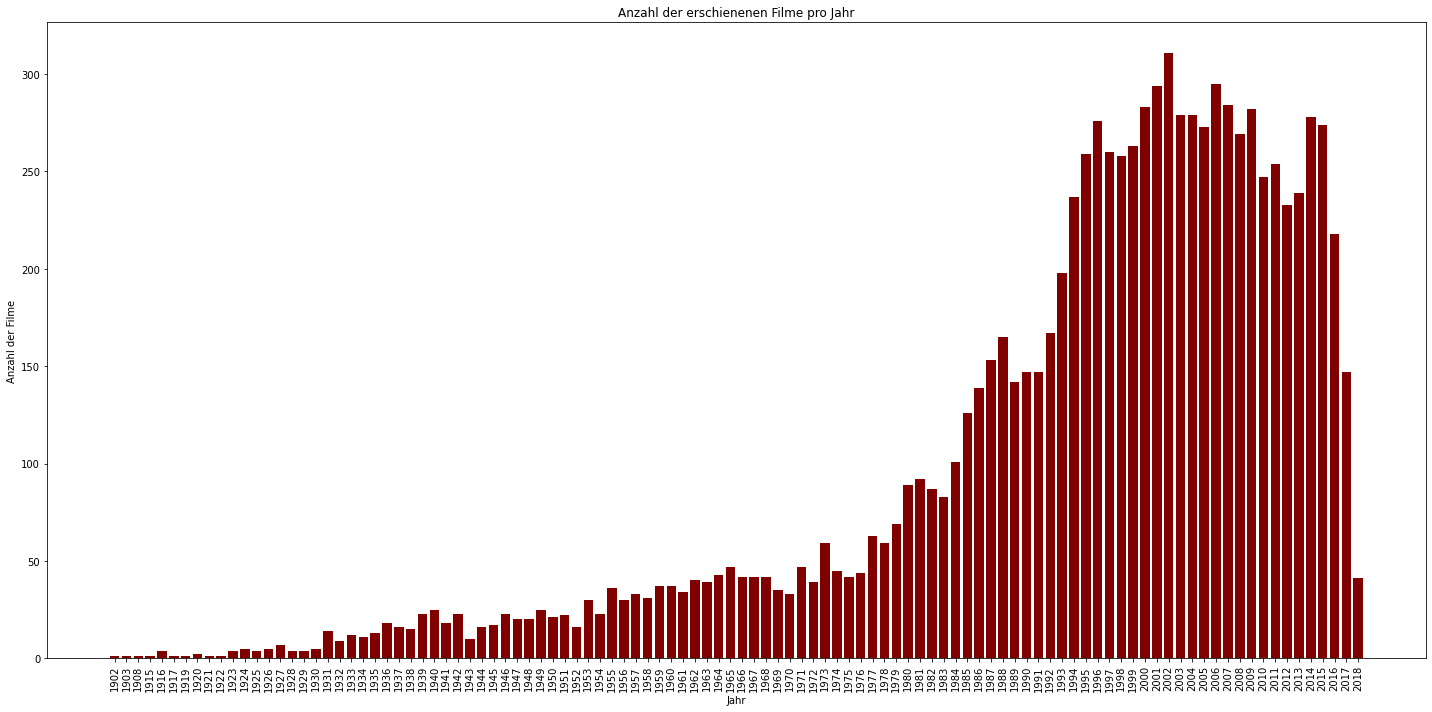

In [67]:
# Schauen, in welchem Jahr die meisten Filme erschienen sind
movies_pro_jahr = movies['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(20,10))
plt.bar(movies_pro_jahr.index, movies_pro_jahr.values, color='maroon')
plt.title('Anzahl der erschienenen Filme pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()  

*Diskussion des Plots*: Man kann erkennen, dass es seit 1977 immer mehr Filme gibt. Bei 2018 geht die Anzahl zurück, aber das liegt daran, dass die Spanne des Datensets bis September 2018 geht und wohl viele Weihnachtsfilme nicht erfasst worden sind. 

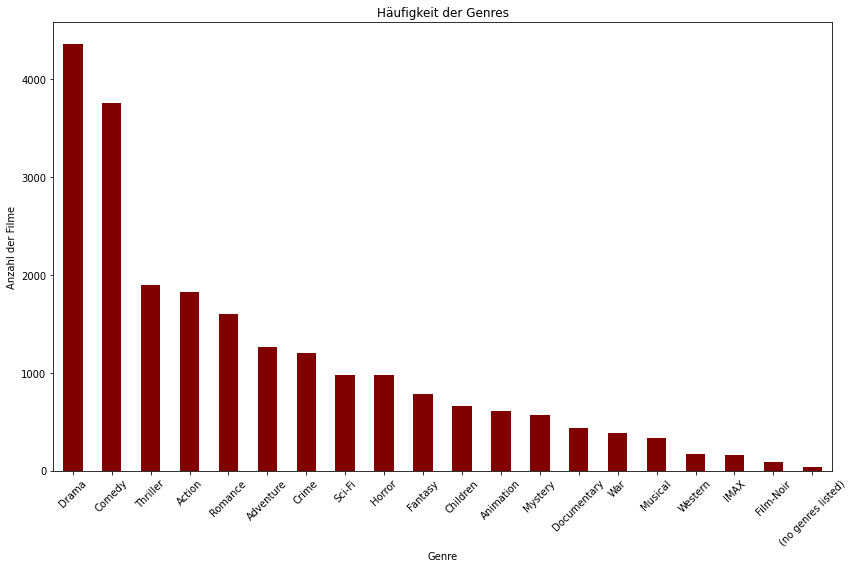

In [68]:
# Schauen, welche Genres am häufigsten vorkommen
genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts()

# Plot
plt.figure(figsize=(12,8))  
genre_counts.plot(kind='bar', color='maroon')  
plt.title('Häufigkeit der Genres')  
plt.xlabel('Genre')  
plt.ylabel('Anzahl der Filme')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

*Diskussion des Plots*: Die meisten Filme sind Dramen, die wenigsten sind Film-Noir-Streifen.

In [69]:
# Schauen, wie viele Filme bei no genres listed dabei sind
no_genre_listed_filme = movies[movies['genres'].str.contains('(no genre listed)')]
anzahl_no_genre_listed = no_genre_listed_filme.shape[0]

print(f"Anzahl der Filme mit 'no_genre_listed': {anzahl_no_genre_listed}")
print("Filme mit 'no_genre_listed':")
print(no_genre_listed_filme)

Anzahl der Filme mit 'no_genre_listed': 0
Filme mit 'no_genre_listed':
Empty DataFrame
Columns: [movieId, title, genres, year]
Index: []


C:\Users\chant\AppData\Local\Temp/ipykernel_12532/376842575.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  no_genre_listed_filme = movies[movies['genres'].str.contains('(no genre listed)')]


In [70]:
# Ratings
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [71]:
ratings.shape

(100836, 4)

##### Beschreibung des Dataframes Ratings
Die Sternebewertungen sind in Halbsterneschritten zwischen 0.5 und 5 Sternen. 

In [72]:
# Anpassung des Timestamps
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s', origin='unix')
print(ratings.head())

   userId  movieId  rating           timestamp
0       1        1     4.0 2000-07-30 18:45:03
1       1        3     4.0 2000-07-30 18:20:47
2       1        6     4.0 2000-07-30 18:37:04
3       1       47     5.0 2000-07-30 19:03:35
4       1       50     5.0 2000-07-30 18:48:51


Hier kann man erkennen, dass die User die Filme vermutlich nicht direkt nach dem Anschauen bewertet haben, da der User 1 innerhalb von 28 Minuten mindestens 5 Filme bewertet hat. Das stellt aus meiner Sicht auch die Bewertungen ein bisschen infrage, denn ich habe auch schon Filme später angeschaut und ganz vergessen, wie toll sie waren. Besser wäre es aus meiner Sicht, wenn die Filme direkt nach dem Anschauen bewertet werden würden. Ich schaue das mit meinem nächsten Code noch genauer an. 

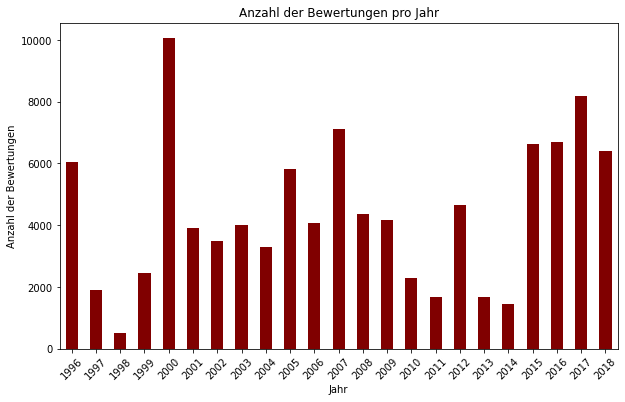

In [73]:
# Count how many recommendations there are per year
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
ratings['Jahr'] = ratings['timestamp'].dt.year
ratings_per_year = ratings['Jahr'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
ratings_per_year.plot(kind = 'bar', color = 'maroon')
plt.title('Anzahl der Bewertungen pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Bewertungen')
plt.xticks(rotation=45)  
plt.show()

*Diskussion des Plots*: Man kann erkennen, dass im Jahr 2000 die meisten Filme bewertet worden sind. 

In [74]:
ratings.shape

(100836, 5)

In [75]:
# Wie viele einzelne User gibt es?
print(ratings['userId'].nunique())

610


In [76]:
# Hat ein User einen Film mehrmals bewertet?
mehrfach = ratings.duplicated(subset=['userId', 'movieId'], keep=False)
hat_mehrfach = mehrfach.any()

if hat_mehrfach:
    print("Es gibt Nutzer, die denselben Film mehrmals bewertet haben.")
    print(ratings[mehrfach])
else:
    print("Kein Nutzer hat einen Film mehrmals bewertet.")

Kein Nutzer hat einen Film mehrmals bewertet.


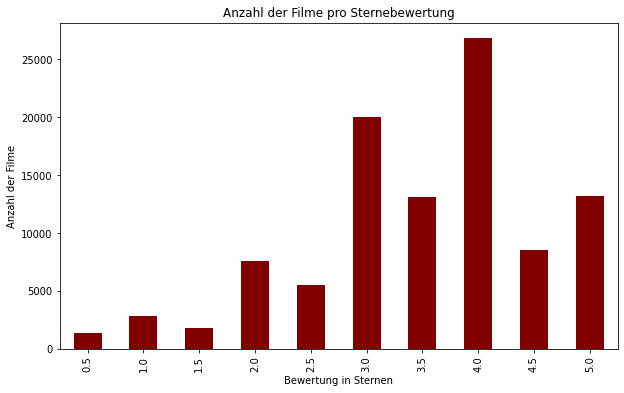

In [77]:
# Wie viele Filme sind wie bewertet worden?
rating_count = ratings['rating'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
rating_count.plot(kind='bar', color='maroon')
plt.title('Anzahl der Filme pro Sternebewertung')
plt.xlabel('Bewertung in Sternen')
plt.ylabel('Anzahl der Filme')
plt.show()

*Diskussion des Plots*: Die wenigsten Filme haben schlechte Bewertungen, die meisten sind eher mittelmässig, was auch dem Stoff aus dem Courserakurs entspricht. Interessant wäre hier eine Aufschlüsselung nach Genre oder der Verlauf nach Jahren. Wenn ich Zeit dafür habe, mache ich das. 

In [78]:
# Namen der Filme hinzufügen
ratings_movies_merged = pd.merge(ratings, movies, on='movieId')
ratings_movies_merged.head()

,userId,movieId,rating,timestamp,Jahr,title,genres,year
0,1,1,4.0,2000-07-30 18:45:03,2000,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,1996-11-08 06:36:02,1996,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,2005-01-25 06:52:26,2005,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,2017-11-13 12:59:30,2017,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,2011-05-18 05:28:03,2011,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995


In [79]:
# Anpassung des Timestamps
ratings_movies_merged['timestamp'] = pd.to_datetime(ratings_movies_merged['timestamp'], unit='s', origin='unix')
print(ratings_movies_merged.head())

   userId  movieId  rating           timestamp  Jahr      title  \
0       1        1     4.0 2000-07-30 18:45:03  2000  Toy Story   
1       5        1     4.0 1996-11-08 06:36:02  1996  Toy Story   
2       7        1     4.5 2005-01-25 06:52:26  2005  Toy Story   
3      15        1     2.5 2017-11-13 12:59:30  2017  Toy Story   
4      17        1     4.5 2011-05-18 05:28:03  2011  Toy Story   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1  Adventure|Animation|Children|Comedy|Fantasy  1995  
2  Adventure|Animation|Children|Comedy|Fantasy  1995  
3  Adventure|Animation|Children|Comedy|Fantasy  1995  
4  Adventure|Animation|Children|Comedy|Fantasy  1995  


In [80]:
# Liste machen mit den besten 20 Filmen gemäss durchschnittlicher Bewertung
mean_ratings = ratings_movies_merged.groupby('title')['rating'].mean()
top_20_movies = mean_ratings.sort_values(ascending=False).head(20)
print(top_20_movies)

title
Hollywood Chainsaw Hookers                    5.0
Calcium Kid, The                              5.0
Chinese Puzzle (Casse-tête chinois)           5.0
Raise Your Voice                              5.0
Rain                                          5.0
Radio Day                                     5.0
Thousand Clowns, A                            5.0
Hunting Elephants                             5.0
Blue Planet II                                5.0
Ballad of Narayama, The (Narayama bushiko)    5.0
Heidi Fleiss: Hollywood Madam                 5.0
Three from Prostokvashino                     5.0
Vagabond (Sans toit ni loi)                   5.0
Tickling Giants                               5.0
Priklyucheniya Kapitana Vrungelya             5.0
Front of the Class                            5.0
Presto                                        5.0
Fugitives                                     5.0
Tokyo Tribe                                   5.0
Tom Segura: Completely Normal               

In [81]:
# Liste machen mit den 20 Filmen, die am häufigsten bewertet worden sind (Top 20 movies by number of views, denn ich gehe davon aus, dass ein Film nur dann bewertet wurde, wenn er gesehen wurde. Das ist aber eine Annahme, die ich nicht überprüfen kann)
ratings_per_movie = ratings_movies_merged.groupby('title')['userId'].nunique()
ratings_per_movie_sorted = ratings_per_movie.sort_values(ascending=False)
top_20_rated_movies = ratings_per_movie_sorted.head(20)
print(top_20_rated_movies)

title
Forrest Gump                                                               329
Shawshank Redemption, The                                                  317
Pulp Fiction                                                               307
Silence of the Lambs, The                                                  279
Matrix, The                                                                278
Star Wars: Episode IV - A New Hope                                         251
Jurassic Park                                                              238
Braveheart                                                                 237
Terminator 2: Judgment Day                                                 224
Schindler's List                                                           220
Fight Club                                                                 218
Toy Story                                                                  215
Star Wars: Episode V - The Empire Strikes Back

In [82]:
# Was ist die durchschnittliche Bewertung für einen Film?
print(ratings_movies_merged['rating'].describe())

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


Erkenntnis: Durchschnittlich wird ein Film mit 3.5 Sternen bewertet, die Bewertung ist also relativ neutral. 

In [83]:
# Was ist die durchschnittliche Bewertung pro Genre?
genres_split = ratings_movies_merged.assign(genre = ratings_movies_merged['genres'].str.split('|')).explode('genre')
print(genres_split.groupby('genre')['rating'].describe())

                      count      mean       std  min   25%  50%  75%  max
genre                                                                    
(no genres listed)     47.0  3.489362  1.218023  0.5  2.75  3.5  4.5  5.0
Action              30635.0  3.447984  1.050930  0.5  3.00  3.5  4.0  5.0
Adventure           24161.0  3.508609  1.029073  0.5  3.00  3.5  4.0  5.0
Animation            6988.0  3.629937  0.969664  0.5  3.00  4.0  4.0  5.0
Children             9208.0  3.412956  1.055996  0.5  3.00  3.5  4.0  5.0
Comedy              39053.0  3.384721  1.066541  0.5  3.00  3.5  4.0  5.0
Crime               16681.0  3.658294  0.994673  0.5  3.00  4.0  4.5  5.0
Documentary          1219.0  3.797785  0.820461  0.5  3.50  4.0  4.5  5.0
Drama               41928.0  3.656184  0.979133  0.5  3.00  4.0  4.5  5.0
Fantasy             11834.0  3.491001  1.038688  0.5  3.00  3.5  4.0  5.0
Film-Noir             870.0  3.920115  0.886997  0.5  3.50  4.0  4.5  5.0
Horror               7291.0  3.258195 

In [84]:
# Wie viele User haben gar keinen Film bewertet?
user_item_matrix = ratings_movies_merged.pivot_table(index='userId', columns='movieId', values='rating')
user_item_matrix = user_item_matrix.fillna(0)

num_users_with_no_ratings = (user_item_matrix == 0).all(axis=1).sum()

print(f"So viele User haben keinen Film bewertet: {num_users_with_no_ratings}")

So viele User haben keinen Film bewertet: 0


In [85]:
# Wie viele Filme wurden gar nicht bewertet?
user_item_matrix = ratings_movies_merged.pivot_table(index='userId', columns='movieId', values='rating')
user_item_matrix = user_item_matrix.fillna(0)

num_items_with_no_ratings = (user_item_matrix == 0).all(axis=0).sum()

print(f"So viele Filme wurden nicht bewertet: {num_items_with_no_ratings}")

So viele Filme wurden nicht bewertet: 0


In [86]:
tags.head

<bound method NDFrame.head of       userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]>

In [87]:
# Anpassen der Timestamp
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s', origin='unix')
print(tags.head())

   userId  movieId              tag           timestamp
0       2    60756            funny 2015-10-24 19:29:54
1       2    60756  Highly quotable 2015-10-24 19:29:56
2       2    60756     will ferrell 2015-10-24 19:29:52
3       2    89774     Boxing story 2015-10-24 19:33:27
4       2    89774              MMA 2015-10-24 19:33:20


In [88]:
# Welcher Tag kommt wie oft vor?
tag_counts = tags['tag'].value_counts()
print("Tags:")
print(tag_counts)

Tags:
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
small towns            1
In Your Eyes           1
Lloyd Dobbler          1
weak plot              1
Heroic Bloodshed       1
Name: tag, Length: 1589, dtype: int64


##### Beantwortung der Fragen

In [89]:
# Tabelle, in der man die 20 meistgesehenen Filme und deren Bewertung sieht 
most_rated_movies = ratings_movies_merged.groupby('title').agg(
    user_count = pd.NamedAgg(column='userId', aggfunc='nunique'),
    mean_rating = pd.NamedAgg(column='rating', aggfunc='mean')
)
movies_sorted = most_rated_movies.sort_values(by='user_count', ascending=False)
top_20 = movies_sorted.head(20)

print(top_20)

                                                    user_count  mean_rating
title                                                                      
Forrest Gump                                               329     4.164134
Shawshank Redemption, The                                  317     4.429022
Pulp Fiction                                               307     4.197068
Silence of the Lambs, The                                  279     4.161290
Matrix, The                                                278     4.192446
Star Wars: Episode IV - A New Hope                         251     4.231076
Jurassic Park                                              238     3.750000
Braveheart                                                 237     4.031646
Terminator 2: Judgment Day                                 224     3.970982
Schindler's List                                           220     4.225000
Fight Club                                                 218     4.272936
Toy Story   

In [90]:
# Tabelle der 20 meistgesehenen Filme sortiert nach Bewertung
most_rated_movies = ratings_movies_merged.groupby('title').agg(
    user_count=pd.NamedAgg(column='userId', aggfunc='nunique'),
    mean_rating=pd.NamedAgg(column='rating', aggfunc='mean')
)

movies_sorted = most_rated_movies.sort_values(by='user_count', ascending=False)
top_20 = movies_sorted.head(20).sort_values(by='mean_rating', ascending=False)

print(top_20)

                                                    user_count  mean_rating
title                                                                      
Shawshank Redemption, The                                  317     4.429022
Fight Club                                                 218     4.272936
Usual Suspects, The                                        204     4.237745
Star Wars: Episode IV - A New Hope                         251     4.231076
Schindler's List                                           220     4.225000
Star Wars: Episode V - The Empire Strikes Back             211     4.215640
Raiders of the Lost Ark (Indiana Jones and the ...         200     4.207500
Pulp Fiction                                               307     4.197068
Matrix, The                                                278     4.192446
Forrest Gump                                               329     4.164134
Silence of the Lambs, The                                  279     4.161290
Lord of the 

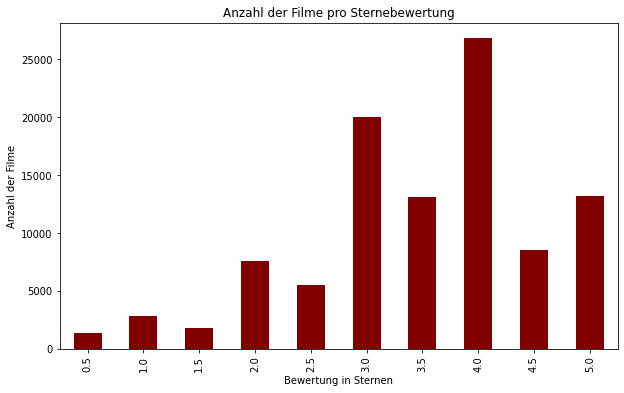

In [91]:
# What is the range of the ratings? 
rating_count = ratings['rating'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
rating_count.plot(kind='bar', color='maroon')
plt.title('Anzahl der Filme pro Sternebewertung')
plt.xlabel('Bewertung in Sternen')
plt.ylabel('Anzahl der Filme')
plt.show()

In [92]:
# Which genre has been rated how many times?
genres_sliced = ratings_movies_merged.assign(genre = ratings_movies_merged['genres'].str.split('|')).explode('genre')
genre_frequency = genres_sliced['genre'].value_counts()

print(genre_frequency)

Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
Name: genre, dtype: int64


In [93]:
# How sparse is the User Rating Matrix?
user_item_matrix = ratings_movies_merged.pivot_table(index='userId', columns='movieId', values='rating')
user_item_matrix = user_item_matrix.fillna(0)
#print(user_item_matrix)

zeroes_count = (user_item_matrix == 0).sum().sum()
non_zeroes_count = (user_item_matrix != 0).sum().sum()
size_of_matrix = user_item_matrix.size

zeroes_percentage = (zeroes_count / size_of_matrix) * 100
non_zeroes_percentage = (non_zeroes_count / size_of_matrix) * 100

print("Prozentualer Anteil von Nullen in der Matrix: ", zeroes_percentage)
print("Prozentualer Anteil von Nicht-Nullen in der Matrix:", non_zeroes_percentage)

Prozentualer Anteil von Nullen in der Matrix:  98.30003169443864
Prozentualer Anteil von Nicht-Nullen in der Matrix: 1.6999683055613624


Erkenntnis: Die Matrix ist sehr sparse, da 98 Prozent der Elemente der Matrix sind Nullen, also haben keine Bewertung. 

In [94]:
# In den weiteren Aufgaben hatte ich Probleme mit der Matrix. Das liegt daran, dass die Bewertungen als str und nicht als num gespeichert sind.
#for zeilenindex, zeile in enumerate(user_item_matrix):
    #for elementindex, element in enumerate(zeile):
        #print(f"Typ von Element in Zeile {zeilenindex+1}, Spalte {elementindex+1}: {type(element)}")

user_item_matrix = user_item_matrix.applymap(pd.to_numeric, errors='coerce')
user_item_matrix = user_item_matrix.fillna(0)

In [95]:
# How many users have rated how many movies
ratings_per_user = ratings_movies_merged.groupby('userId')['movieId'].count()
print(ratings_per_user)

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64


C:\Users\chant\AppData\Local\Temp/ipykernel_12532/185433571.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(y*100) for y in y_ticks])


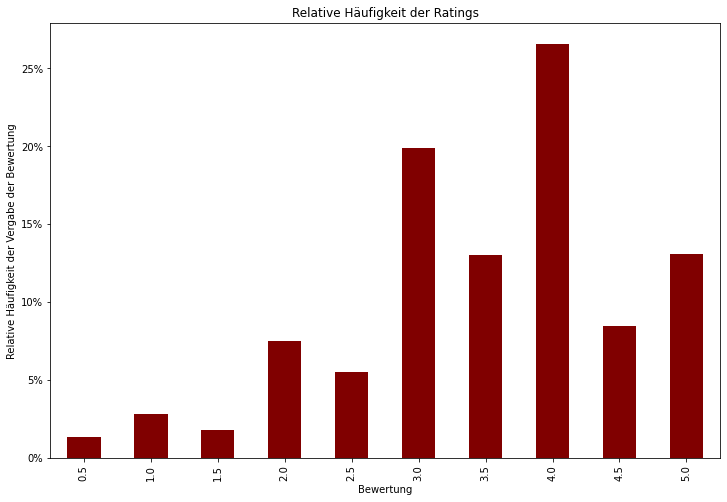

In [96]:
# Which rating ist given how often on average
ratings_frequency = ratings_movies_merged['rating'].value_counts(normalize=True).sort_index()

# Plot
plt.figure(figsize=(12, 8))
ax = ratings_frequency.plot(kind='bar', color='maroon')
plt.title('Relative Häufigkeit der Ratings')
plt.xlabel('Bewertung')
plt.ylabel('Relative Häufigkeit der Vergabe der Bewertung')

y_ticks = ax.get_yticks()
ax.set_yticklabels(['{:.0f}%'.format(y*100) for y in y_ticks])

plt.show()

*Diskussion des Plots*: Relativ gesehen werden die meisten Filme mit vier Sternen bewertet, gefolgt von drei und 3.5 und 5. Das heisst, die Filme werden tendenziell eher gut bewertet. 

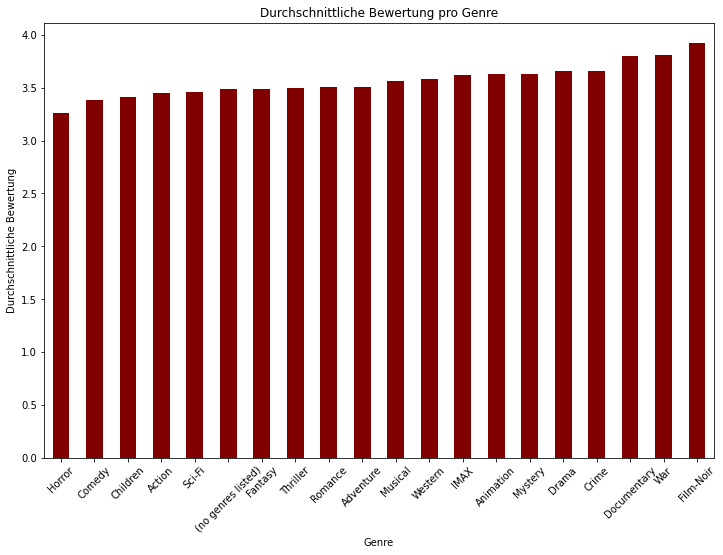

In [97]:
# Which rating is given how often on average per genre
genre_mean_ratings = genres_split.groupby('genre')['rating'].mean()

# Plot
plt.figure(figsize=(12, 8))
genre_mean_ratings.sort_values().plot(kind='bar', color='maroon')
plt.title('Durchschnittliche Bewertung pro Genre')
plt.xlabel('Genre')
plt.ylabel('Durchschnittliche Bewertung')
plt.xticks(rotation=45)
plt.show()

*Diskussion des Plots*: Durchschnittlich werden Horrorfilme am wenigsten gut bewertet, am besten die Film-Noir. Ich habe oben gesehen, dass die Film-Noir-Filme am wenigsten häufig bewertet werden, vielleicht könnte das eine Erklärung dafür sein.

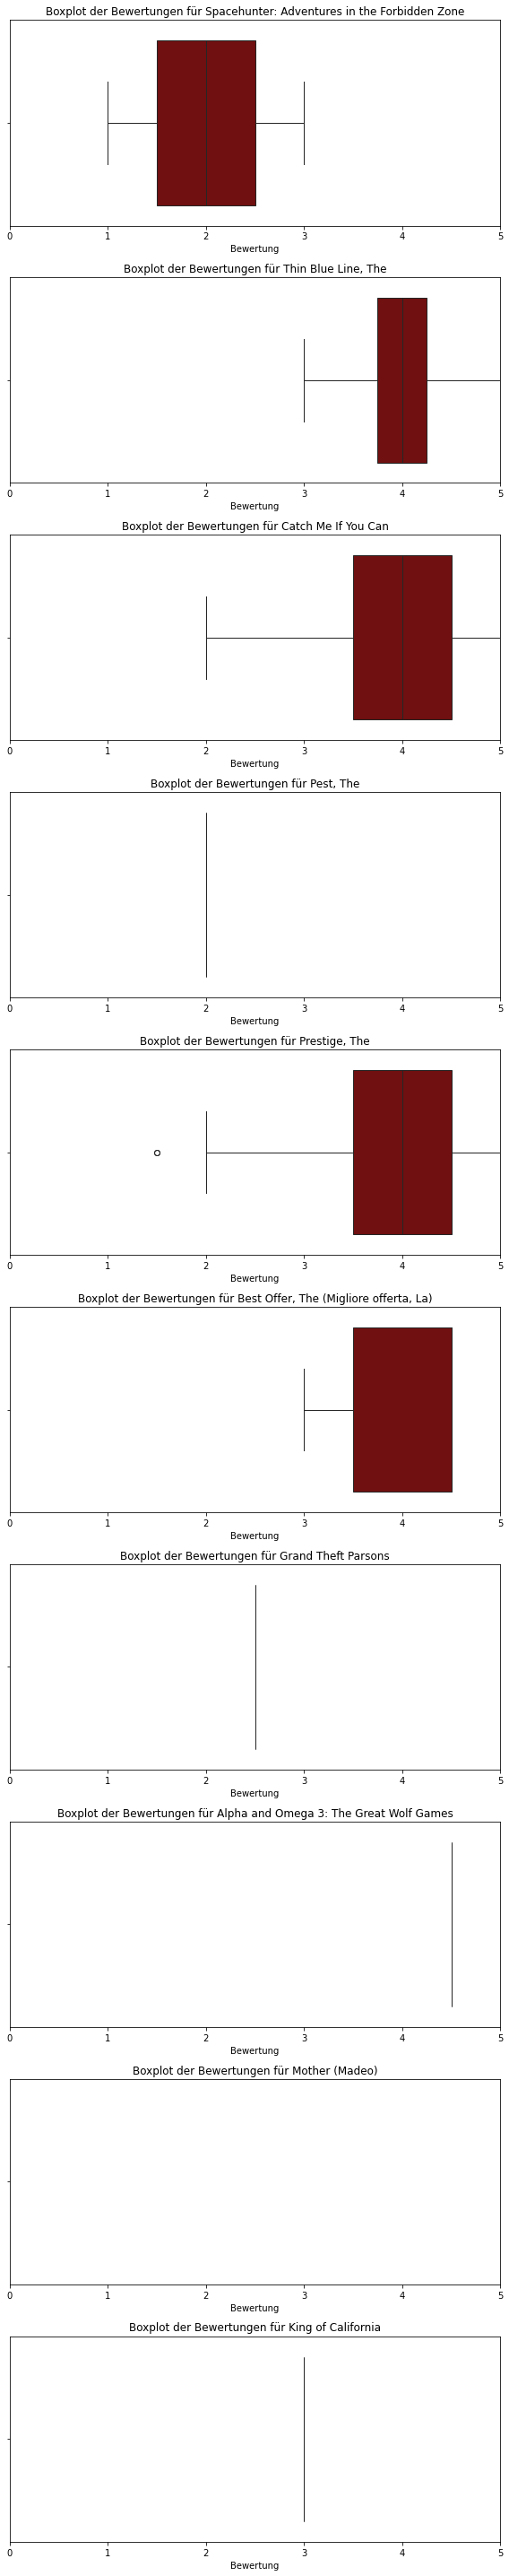

In [98]:
# Distribution of 10 random movies
np.random.seed(42)

random_movies = np.random.choice(ratings_movies_merged['title'].unique(), 10, replace=False)
chosen_movies = ratings_movies_merged[ratings_movies_merged['title'].isin(random_movies)]

# Plot
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(8, 40))  
for ax, film in zip(axes, random_movies):
    df_movies = chosen_movies[chosen_movies['title'] == film]
    sns.boxplot(data=df_movies, x='rating', ax=ax, color='maroon')  
    ax.set_title(f'Boxplot der Bewertungen für {film}')
    ax.set_xlabel('Bewertung')
    ax.set_xlim(0, 5)

plt.tight_layout()
plt.show()

*Diskussion des Plots*: Die Plots, die nur einen Strich  haben, haben nur eine Bewertung. Der Film ohne Boxplot hat gar keine Bewertung.

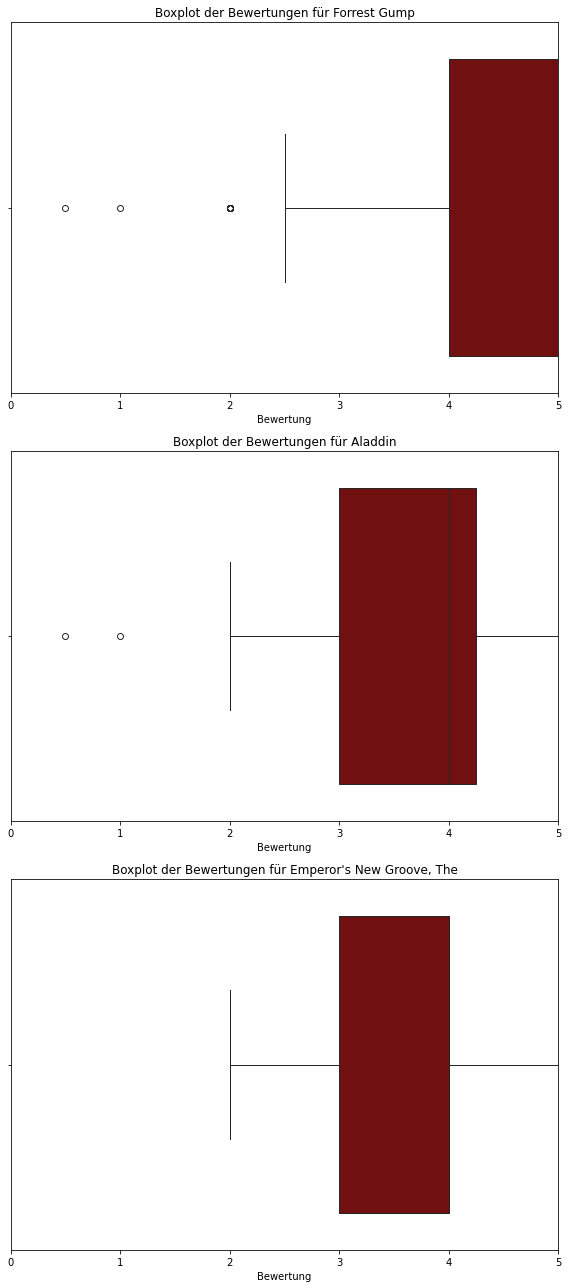

In [99]:
# The rating distributions of 3 movies that you have watched: Forest Gump, Aladdin and The Emperors new Groove 1
movies_i_watched = ["Forrest Gump", "Aladdin", "Emperor's New Groove, The"]
chosen_movies = ratings_movies_merged[ratings_movies_merged['title'].isin(movies_i_watched)]

# Plot
fig, axes = plt.subplots(nrows=len(movies_i_watched), ncols=1, figsize=(8, 6 * len(movies_i_watched)))
if len(movies_i_watched) == 1:  
    axes = [axes]

for ax, film in zip(axes, movies_i_watched):
    df_movies = chosen_movies[chosen_movies['title'] == film]
    sns.boxplot(data=df_movies, x='rating', ax=ax, color='maroon')
    ax.set_title(f'Boxplot der Bewertungen für {film}')
    ax.set_xlabel('Bewertung')
    ax.set_xlim(0, 5)

plt.tight_layout()
plt.show()

In [100]:
# Heatmap of the User-Item-Matrix: This is the code for the whole matrix. My laptop fails to load the matrix, so I'll do it with a smaller version of the matrix
#plt.figure(figsize=(20, 15))  
#sns.heatmap(user_item_matrix, annot=True, fmt=".1f", cmap='viridis')
#plt.title('Heatmap der User-Item-Matrix')
#plt.xlabel('Item (movies)')
#plt.ylabel('User')
#plt.show()

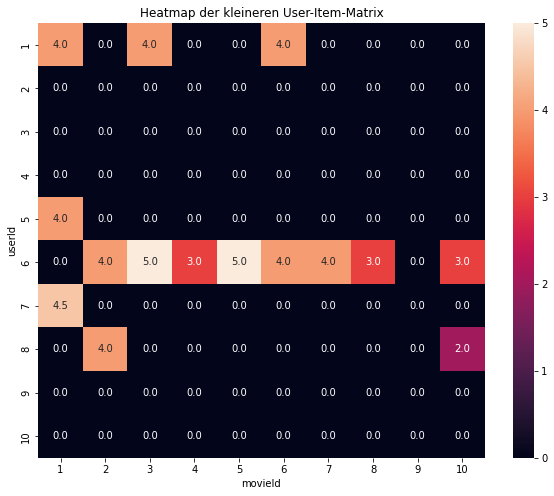

In [101]:
# Heatmap for the smaller User-Item-Matrix
smaller_matrix = user_item_matrix.iloc[:10, :10]

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(smaller_matrix, annot=True, fmt=".1f", cmap='rocket')
plt.title('Heatmap der kleineren User-Item-Matrix')
plt.show()

*Diskussion des Plots*: Man kann erkennen, welche User wie oft welchen Film bewertet haben. So ist User 6 beispielsweise sehr sehr fleissig im Bewerten, die User 2,3,4,9,10 haben aber keine einzige Bewertung abgegeben. Da ich gesehen habe, dass die Matrix zu 98% aus Nullen besteht, gehe ich davon aus, dass die Heatmap der grossen Matrix mit allen Daten etwa genau so, vielleicht noch ein wenig dünkler, also mit mehr Nullen, aussieht. 

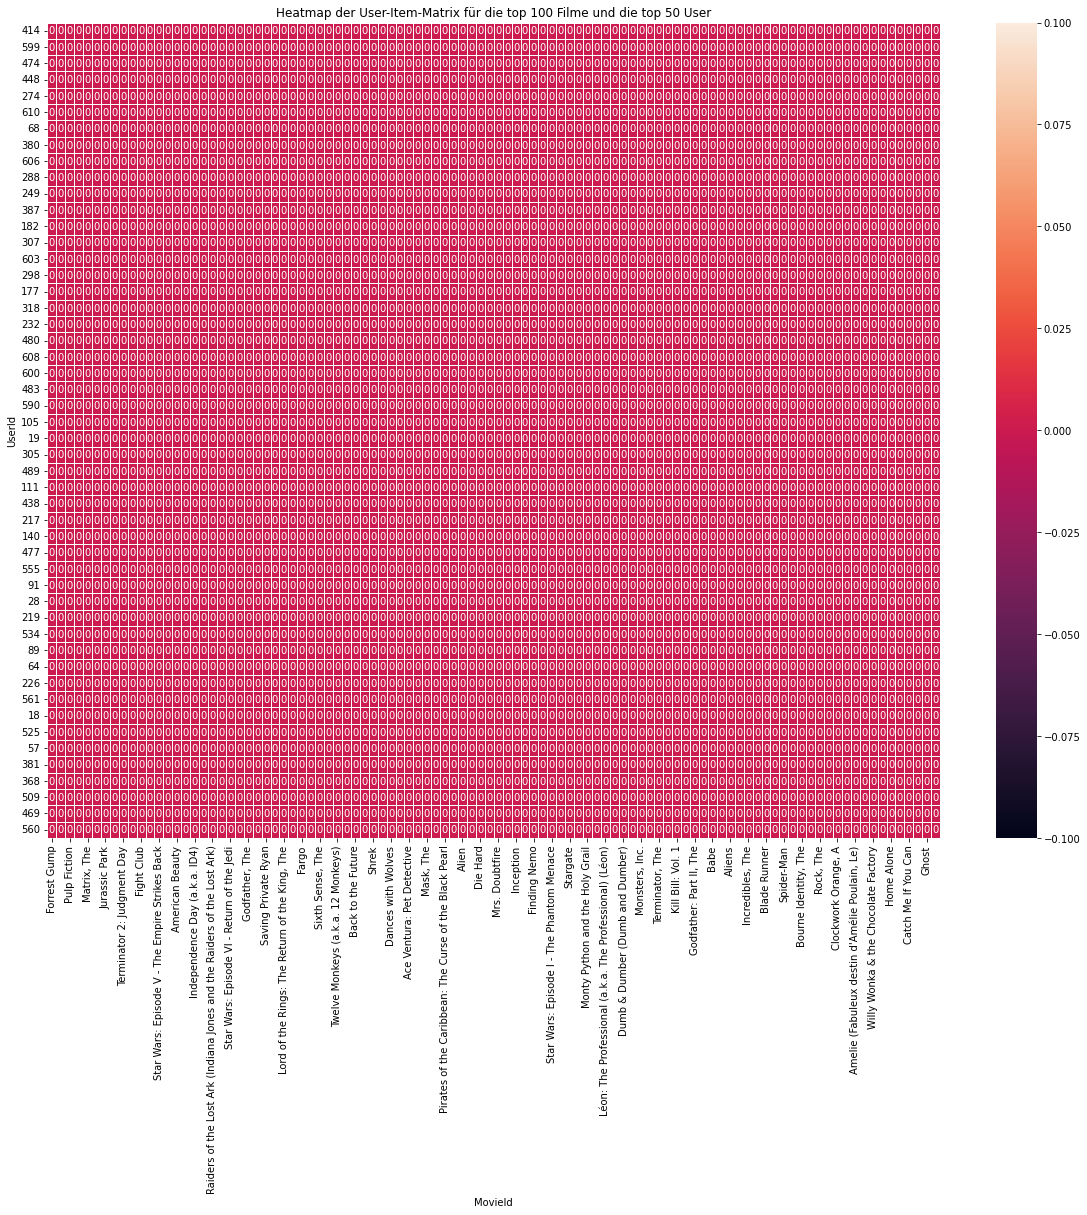

In [102]:
# Heatmap for the User-Item-Matrix for the 100 most rated movies for the 50 users with most ratings
top_100_movies = ratings_movies_merged['title'].value_counts().head(100).index
top_50_users = ratings_movies_merged['userId'].value_counts().head(50).index

user_item_matrix_top = pd.DataFrame(index = top_50_users, columns = top_100_movies)
user_item_matrix_top = user_item_matrix_top.fillna(0)

for index, row in ratings_movies_merged.iterrows():
    user = row['userId']
    movie = row['movieId']
    rating = row['rating']
    
    if user in top_50_users and movie in top_100_movies:
        user_item_matrix_top.at[user, movie] = rating

#print(user_item_matrix_top)
        
plt.figure(figsize=(20, 15))  
sns.heatmap(user_item_matrix_top, cmap = 'rocket', annot = True, linewidths = 0.5)
plt.title('Heatmap der User-Item-Matrix für die top 100 Filme und die top 50 User')
plt.xlabel('MovieId')
plt.ylabel('UserId')
plt.show()

*Diskussion des Plots*: Offenbar haben die User, die die meisten Filme bewertet haben, die 100 beliebtesten Filme nicht bewertet. 

### Exercise 2 - Building a baseline RS (7 points)
In this exercise we will build a baseline RS and functions to calculate fundamental performance metrics. 

Build the following baseline RS to predict Top-N (default N=20):
1. In reference to the book *Collaborative Filtering Recommender Systems by Michael D. Ekstrand, John T. Riedl and Joseph A. Konstan* (p. 91ff) implement the baseline predictor $$ b_{u,i}= \mu +b_u +b_i $$ with the regularized user and item average offsets: $$ b_u = \frac{1}{|I_u| + \beta_u} \sum_{i \in I_u} (r_{u,i} - \mu) $$ and $$ b_i = \frac{1}{|U_i| + \beta_i} \sum_{u \in U_i} (r_{u,i} - b_u - \mu) . $$ Build a recommender system upon this baseline predictor. Set the default damping factors $\beta_u$ and $\beta_i$ both to 20.
2. Build a RS that recommends based on *random* recommendations.  

Output the recommendations for three example users of your choice. Can you find a user that represents your taste? 

In [103]:
# Basis
beta_u = 20
beta_i = 20
matrix = user_item_matrix
users_count, items_count = matrix.shape

# mu berechnen
sum_of_all_elements = matrix.sum().sum()
elements_count = matrix.size
mu = sum_of_all_elements / elements_count

# bu berechnen
bu = np.zeros(users_count)  
for i in range(users_count):
    user_ratings = matrix.iloc[i, :].to_numpy()  # Damits mit der Matrix funktioniert
    Iu = np.count_nonzero(user_ratings)  
    if Iu > 0:  
        sum_user_rating = np.sum(user_ratings[user_ratings != 0] - mu)  
        bu[i] = (1 / (Iu + beta_u)) * sum_user_rating

# bi berechnen
bi = np.zeros(items_count)
for j in range(items_count):
    item_ratings = matrix.iloc[:, j].to_numpy()  
    Ui = np.count_nonzero(item_ratings) # Schauen, ob ein User diesen Film überhaupt bewertet hat
    if Ui > 0:
        valid_indices = np.nonzero(item_ratings)[0]
        valid_ratings = item_ratings[item_ratings != 0]
        sum_item_rating = np.sum(valid_ratings - (bu[valid_indices] + mu))
        bi[j] = (1 / (Ui + beta_i)) * sum_item_rating

# bui berechnen für einen bestimmten User und ein bestimmtes Item
def prediction_single_rating(u, i):
    if 0 <= u < users_count and 0 <= i < items_count:
        bui = mu + bu[u] + bi[i]
        return bui
    else:
        print("Eine Vorhersage ist nicht möglich.")

# bui berechnen für alle Users und Items, die Null sind

In [104]:
# Funktion
def baseline_predictor(matrix, beta_u=20, beta_i=20):
    users_count, items_count = matrix.shape
    
    valid_entries = matrix.values[matrix.values != 0]
    mu = valid_entries.mean() if valid_entries.size > 0 else 0

    bu = np.zeros(users_count)
    for i in range(users_count):
        user_ratings = matrix.iloc[i, :].values
        valid_user_ratings = user_ratings[user_ratings != 0]
        Iu = valid_user_ratings.size
        if Iu > 0:
            bu[i] = np.sum(valid_user_ratings - mu) / (Iu + beta_u)

    bi = np.zeros(items_count)
    for j in range(items_count):
        item_ratings = matrix.iloc[:, j].values
        valid_item_ratings = item_ratings[item_ratings != 0]
        Ui = valid_item_ratings.size
        if Ui > 0:
            sum_item_rating = np.sum(valid_item_ratings - (bu[np.nonzero(item_ratings)] + mu))
            bi[j] = sum_item_rating / (Ui + beta_i)

    return mu, bu, bi


In [105]:
# Funktion besser
def baseline_predictor(matrix, beta_u=20, beta_i=20):
    users_count, items_count = matrix.shape

    # Berechnung von mu
    valid_entries = matrix[matrix != 0]  
    mu = valid_entries.mean() if valid_entries.size > 0 else 0

    # Berechnung von bu
    bu = np.zeros(users_count)
    for i in range(users_count):
        user_ratings = matrix[i, :]
        valid_user_ratings = user_ratings[user_ratings != 0]
        Iu = valid_user_ratings.size
        if Iu > 0:
            bu[i] = np.sum(valid_user_ratings - mu) / (Iu + beta_u)

    # Berechnung von bi
    bi = np.zeros(items_count)
    for j in range(items_count):
        item_ratings = matrix[:, j]
        valid_item_ratings = item_ratings[item_ratings != 0]
        Ui = valid_item_ratings.size
        if Ui > 0:
            sum_item_rating = np.sum(valid_item_ratings - mu)
            bi[j] = sum_item_rating / (Ui + beta_i)

    def prediction_of_single_rating(u, i):
        if 0 <= u < users_count and 0 <= i < items_count:
            return mu + bu[u] + bi[i]
        else:
            return "Eine Vorhersage ist nicht möglich."

    def predict_all_ratings():
        predicted_ratings = np.zeros((users_count, items_count))
        for u in range(users_count):
            for i in range(items_count):
                predicted_ratings[u, i] = prediction_of_single_rating(u, i)
        return predicted_ratings

    return prediction_of_single_rating, predict_all_ratings

In [106]:
# Random recommender system
user_item_matrix = ratings_movies_merged.pivot_table(index='userId', columns='title', values='rating')
user_item_matrix = user_item_matrix.fillna(0)

def random_recommendations(matrix, user_index, n):
    num_items = matrix.shape[1]  
    item_indices = np.arange(num_items)  
    recommended_item_indices = np.random.choice(item_indices, size=n, replace=False)
    
    return recommended_item_indices

In [107]:
# Ausprobieren
recommended_items = random_recommendations(user_item_matrix, 1, 1)
print("Recommended Item Indices for User 1:", recommended_items)


Recommended Item Indices for User 1: [5230]


In [108]:
# Ich nehme hier User 1, 2 und 3 für das Item 1 
single_rating_predictor, _ = baseline_predictor(matrix=user_item_matrix.values) # Modell trainieren und Funktionen erhalten

user_ids = [1, 2, 3]  
item_id = 1

print("Zu:")
for user_id in user_ids:
    predicted_rating = single_rating_predictor(user_id, item_id)
    print(f"User {user_id}: {predicted_rating}")

Zu:
User 1: 3.7898943749732124
User 2: 2.8210490017315157
User 3: 3.574737170322519


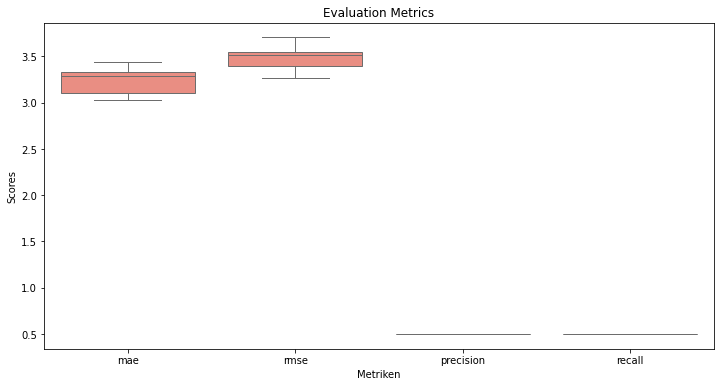

Durchschnittliche Ergebnisse:
mae: 3.2378
rmse: 3.4871
precision: 0.5000
recall: 0.5000


In [109]:
# Korrektur @Moritz: Die Klasse von Aufgabe 3 wurde eingefügt, ansonsten kein Code geändert
class RecommenderEvaluator:
    def __init__(self, matrix, metrics=None, num_iterations=5, test_ratio=0.3):
        self.matrix = matrix
        self.num_iterations = num_iterations
        self.test_ratio = test_ratio
        self.metrics = metrics or ['mae', 'rmse', 'precision', 'recall']
        self.results = {metric: [] for metric in self.metrics}

    def calculate_mae(self, predictions, true_ratings, mask):
        errors = predictions[mask] - true_ratings[mask]
        return np.mean(np.abs(errors))

    def calculate_rmse(self, predictions, true_ratings, mask):
        errors = predictions[mask] - true_ratings[mask]
        return np.sqrt(np.mean(errors ** 2))

    def calculate_precision(self, predictions, true_ratings, n=15, threshold=3.5):
        precision_scores = []
        for user_idx in range(predictions.shape[0]):
            user_predictions = predictions[user_idx, :]
            user_true_ratings = true_ratings[user_idx, :]
            relevant_items = user_true_ratings >= threshold
            top_n_indices = np.argsort(user_predictions)[-n:]
            selected_relevant = relevant_items[top_n_indices]
            precision = selected_relevant.sum() / min(n, relevant_items.sum()) if relevant_items.sum() > 0 else 0
            precision_scores.append(precision)
        return np.mean(precision_scores)

    def calculate_recall(self, predictions, true_ratings, n=15, threshold=3.5):
        recall_scores = []
        for user_idx in range(predictions.shape[0]):
            user_predictions = predictions[user_idx, :]
            user_true_ratings = true_ratings[user_idx, :]
            relevant_items = user_true_ratings >= threshold
            top_n_indices = np.argsort(user_predictions)[-n:]
            selected_relevant = relevant_items[top_n_indices]
            recall = selected_relevant.sum() / relevant_items.sum() if relevant_items.sum() > 0 else 0
            recall_scores.append(recall)
        return np.mean(recall_scores)
    
    def evaluate_predictions(self, predictions, mask):
        if 'mae' in self.metrics:
            self.results['mae'].append(self.calculate_mae(predictions, self.matrix, mask))
        if 'rmse' in self.metrics:
            self.results['rmse'].append(self.calculate_rmse(predictions, self.matrix, mask))
        if 'precision' in self.metrics:
            self.results['precision'].append(self.calculate_precision(predictions, self.matrix))
        if 'recall' in self.metrics:
            self.results['recall'].append(self.calculate_recall(predictions, self.matrix))

    def evaluation_loop(self):
        for _ in range(self.num_iterations):
            mask = np.random.rand(*self.matrix.shape) < self.test_ratio
            train_matrix = self.matrix.copy()
            train_matrix[mask] = 0
            test_matrix = np.zeros_like(self.matrix)
            test_matrix[mask] = self.matrix[mask]
            
            predictor, predict_all = baseline_predictor(train_matrix)
            all_predictions = predict_all()
            
            if 'mae' in self.metrics:
                self.results['mae'].append(self.calculate_mae(all_predictions, self.matrix, mask))
            if 'rmse' in self.metrics:
                self.results['rmse'].append(self.calculate_rmse(all_predictions, self.matrix, mask))
            if 'precision' in self.metrics:
                self.results['precision'].append(self.calculate_precision(all_predictions, self.matrix))
            if 'recall' in self.metrics:
                self.results['recall'].append(self.calculate_recall(all_predictions, self.matrix))

    def plot_results(self):
        scores_df = pd.DataFrame(self.results)
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=scores_df, palette=["salmon"] * len(self.metrics))
        plt.title('Evaluation Metrics')
        plt.xlabel('Metriken')
        plt.ylabel('Scores')
        plt.show()

# Erster Versuch: Funktion schreiben, bei der zuerst die User-Item-Matrix in Train und Test gesplittet wird.
# Dann durch ein Modell laufen lassen und die Scores berechnen
# Funktion besser
def baseline_predictor(matrix, beta_u=20, beta_i=20):
    users_count, items_count = matrix.shape

    # Berechnung von mu
    valid_entries = matrix[matrix != 0]  
    mu = valid_entries.mean() if valid_entries.size > 0 else 0

    # Berechnung von bu
    bu = np.zeros(users_count)
    for i in range(users_count):
        user_ratings = matrix[i, :]
        valid_user_ratings = user_ratings[user_ratings != 0]
        Iu = valid_user_ratings.size
        if Iu > 0:
            bu[i] = np.sum(valid_user_ratings - mu) / (Iu + beta_u)

    # Berechnung von bi
    bi = np.zeros(items_count)
    for j in range(items_count):
        item_ratings = matrix[:, j]
        valid_item_ratings = item_ratings[item_ratings != 0]
        Ui = valid_item_ratings.size
        if Ui > 0:
            sum_item_rating = np.sum(valid_item_ratings - mu)
            bi[j] = sum_item_rating / (Ui + beta_i)

    def prediction_of_single_rating(u, i):
        if 0 <= u < users_count and 0 <= i < items_count:
            return mu + bu[u] + bi[i]
        else:
            return "Eine Vorhersage ist nicht möglich."

    def predict_all_ratings():
        predicted_ratings = np.zeros((users_count, items_count))
        for u in range(users_count):
            for i in range(items_count):
                predicted_ratings[u, i] = prediction_of_single_rating(u, i)
        return predicted_ratings

    return prediction_of_single_rating, predict_all_ratings

np.random.seed(42)
smaller_matrix_np = np.array(smaller_matrix)
evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, metrics=['mae', 'rmse', 'precision', 'recall'], num_iterations=5, test_ratio=0.3)
evaluator.evaluation_loop()
evaluator.plot_results()

# Durchschnittliche Ergebnisse anzeigen
print("Durchschnittliche Ergebnisse:")
for metric, scores in evaluator.results.items():
    print(f"{metric}: {np.mean(scores):.4f}")

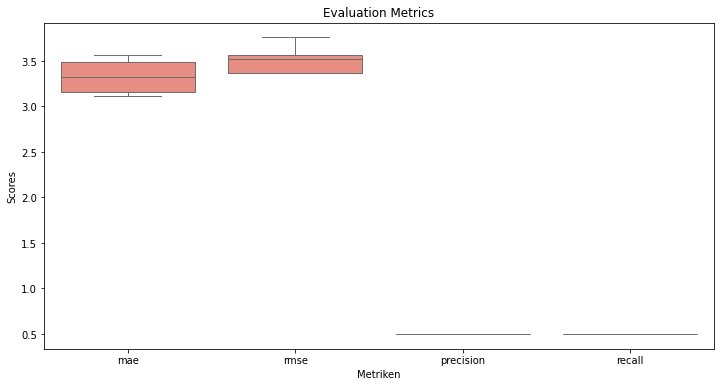

Durchschnittliche Ergebnisse:
mae: 3.3306
rmse: 3.5162
precision: 0.5000
recall: 0.5000


In [110]:
# Auch hier, das wurde im Nachhinein gemacht also bitte zuerst die Aufgabe 3 laufen lassen. Metriken für Random recommendations
user_item_matrix = ratings_movies_merged.pivot_table(index='userId', columns='title', values='rating')
user_item_matrix = user_item_matrix.fillna(0)

def random_recommendations(matrix, user_index, n):
    num_items = matrix.shape[1]  
    item_indices = np.arange(num_items)  
    recommended_item_indices = np.random.choice(item_indices, size=n, replace=False)
    
    return recommended_item_indices

smaller_matrix_np = np.array(smaller_matrix)
evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, metrics=['mae', 'rmse', 'precision', 'recall'], num_iterations=5, test_ratio=0.3)
evaluator.evaluation_loop()
evaluator.plot_results()

# Durchschnittliche Ergebnisse anzeigen
print("Durchschnittliche Ergebnisse:")
for metric, scores in evaluator.results.items():
    print(f"{metric}: {np.mean(scores):.4f}")

### Exercise 3 - Evaluation methods (8 points)

Implement a function to partition your dataset for an offline evaluation based on holding out of random users with 5x cross validation. *Use this for all further exercises*
Explain your considerations.

Implement functions to calculate the following metrics:
- *Mean Absolute Error (MAE)* 
- *Root Mean Square Error (RMSE)*
- *Precision@N* with default $N=15$ and relevance threshold 3.5 stars.
- *Recall@N* with default $N=15$ and relevance threshold 3.5 stars.

Explain each of these.

Note: For the last two see https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54. 

Erklärung für mich: Bei der Cross Validation werden die Daten der Matrix in mehrere Teile aufgeteilt und durch das Modell laufen lassen. Hier machen wir das 5x damit Overfitting vermieden werden kann und man die Parameter einstellen kann. Das heisst, die Cross validation wird für jeden dieser 5 Folds durchgeführt und man bekommt 5 verschiedene Werte. Damit ich etwas mit diesen Werten anfangen kann, stelle ich sie in einem Plot dar.  

In [111]:
# Erster Versuch: Funktion schreiben, bei der zuerst die User-Item-Matrix in Train und Test gesplittet wird.
# Dann durch ein Modell laufen lassen und die Scores berechnen
def calculate_mae(predictions, true_ratings, mask):
    errors = predictions[mask] - true_ratings[mask]
    return np.mean(np.abs(errors))

def calculate_rmse(predictions, true_ratings, mask):
    errors = predictions[mask] - true_ratings[mask]
    return np.sqrt(np.mean(errors ** 2))

def calculate_precision(predictions, true_ratings, n=15, threshold=3.5):
    precision_scores = []
    for user_idx in range(predictions.shape[0]):
        user_predictions = predictions[user_idx, :]
        user_true_ratings = true_ratings[user_idx, :]
        relevant_items = user_true_ratings >= threshold
        top_n_indices = np.argsort(user_predictions)[-n:]
        selected_relevant = relevant_items[top_n_indices]
        precision = selected_relevant.sum() / n if n > 0 else 0
        precision_scores.append(precision)
    return np.mean(precision_scores)

def calculate_recall(predictions, true_ratings, n=15, threshold=3.5):
    recall_scores = []
    for user_idx in range(predictions.shape[0]):
        user_predictions = predictions[user_idx, :]
        user_true_ratings = true_ratings[user_idx, :]
        relevant_items = user_true_ratings >= threshold
        top_n_indices = np.argsort(user_predictions)[-n:]
        selected_relevant = relevant_items[top_n_indices]
        recall = selected_relevant.sum() / relevant_items.sum() if relevant_items.sum() > 0 else 0
        recall_scores.append(recall)
    return np.mean(recall_scores)

def evaluate_predictions(self, predictions, mask):
        if 'rmse' in self.metrics:
            self.results['rmse'].append(self.calculate_rmse(predictions, self.matrix, mask))

def evaluation_loop(matrix, num_iterations=5):
    mae_scores = []
    rmse_scores = []
    precision_scores = []
    recall_scores = []
    
    for _ in range(num_iterations):
        mask = np.random.rand(*matrix.shape) < 0.3 # Warum hier 0.3 ausgewählt worden ist, wird im nächsten Snippet erklärt
        train_matrix = matrix.copy()
        train_matrix[mask] = 0
        test_matrix = np.zeros_like(matrix)
        test_matrix[mask] = matrix[mask]
        
        predictor, predict_all = baseline_predictor(train_matrix)
        all_predictions = predict_all()
        
        mae_scores.append(calculate_mae(all_predictions, matrix, mask))
        rmse_scores.append(calculate_rmse(all_predictions, matrix, mask))
        precision_scores.append(calculate_precision(all_predictions, matrix))
        recall_scores.append(calculate_recall(all_predictions, matrix))
    
    # Für Plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

    # RMSE und MAE
    sns.boxplot(data=pd.DataFrame({'MAE': mae_scores, 'RMSE': rmse_scores}), ax=axes[0], color='salmon')
    axes[0].set_title('MAE und RMSE')
    axes[0].set_ylabel('Scores')
    axes[0].set_xlabel('Metriken')

    # Precision und Recall
    sns.boxplot(data=pd.DataFrame({'Precision': precision_scores, 'Recall': recall_scores}), ax=axes[1], color='salmon')
    axes[1].set_title('Precision und Recall')
    axes[1].set_ylabel('Scores in Prozent')
    axes[1].set_xlabel('Metriken')
    axes[1].set_ylim(0, 1)  
    axes[1].set_yticklabels(['{:.0%}'.format(y) for y in axes[1].get_yticks()])  

    plt.tight_layout()
    plt.show()

    return mae_scores, rmse_scores, precision_scores, recall_scores

C:\Users\chant\AppData\Local\Temp/ipykernel_12532/1121661318.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(['{:.0%}'.format(y) for y in axes[1].get_yticks()])


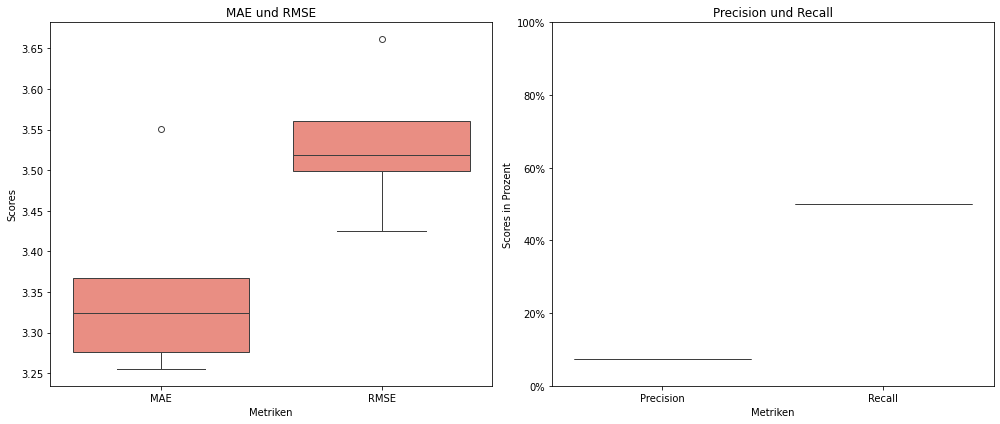

In [112]:
# Ausprobieren
mae_scores, rmse_scores, precision_scores, recall_scores = evaluation_loop(smaller_matrix.values)

Explanation: 

- MAE: Beim MAE wird der vorhergesagte Wert vom tatsächlichen Wert abgezogen und von allen Abweichungen der Durchschnitt berechnet. Wenn der MAE bei 0 liegt, bedeutet das, dass die Vorhersagen perfekt sind. Das kann aber auf ein Overfitting hinweisen. Umso höher der MAE wird, desto ungenauer sind die Vorhersagen. 
- RMSE: Wie beim MSE wird auch hier immer der vom Modell vorhergesagte Wert vom tatsächlichen Wert abgezogen. Dabei wird das Ergebnis aber noch quadiert. Das heisst, umso grösser die Abweichung zwischen vorhergesagtem Wert und tatsächlichem Wert, desto grösser wird der RMSE. Grössere Fehler werden also mehr bestraft. Ein grosser RMSE bedeutet, dass das Modell ungenau ist. 
- Precision@N: Hier wird gemessen, ob ein Film einem Nutzer wirklich gefällt oder nicht. Wir haben den Threshold bei 3.5 definiert, also ab 3.5 Sternen gefällt einem Nutzer der Film. Jetzt wird bei jeder Vorhersage geschaut, ob der tatsächliche Wert wirklich über oder gleich 3.5 ist. Daraus wird dann der Prozentsatz berechnet. Die Berechnung ist hier (Anzahl der relevanten und empfohlenen Items) / (Anzahl der empfohlenen Items), es ist also die Präzision der Empfehlungen, man berechnet, wie viele der empfohlenen Filme korrekt sind.
- Recall@N: Hier werden nur die Anzahl der relevanten Filme, also denjenigen mit 3.5 Sternen und mehr angeschaut und geschaut, wie viele davon vom Modell empfohlen wurden. Man berechnet  (Anzahl der relevanten und empfohlenen Items) / (Anzahl der tatsächlich relevanten Items), man berechnet, wie viele der relevanten Filme vom Modell ausgewählt wurden.  

In [113]:
# Jetzt möchte ich verschiedene Maskierungsanteile ausprobieren, um zu sehen, welchen Anteil ich nehmen soll
def mask_evaluation_loop(matrix, num_iterations=5, thresholds=np.arange(0.1, 1.0, 0.1)):
    all_scores = []

    for threshold in thresholds:
        mae_scores = []
        rmse_scores = []
        precision_scores = []
        recall_scores = []

        for _ in range(num_iterations):
            mask = np.random.rand(*matrix.shape) < threshold
            train_matrix = matrix.copy()
            train_matrix[mask] = 0
            test_matrix = np.zeros_like(matrix)
            test_matrix[mask] = matrix[mask]
            
            predictor, predict_all = baseline_predictor(train_matrix)
            all_predictions = predict_all()
            
            mae_scores.append(calculate_mae(all_predictions, test_matrix, mask))
            rmse_scores.append(calculate_rmse(all_predictions, test_matrix, mask))
            precision_scores.append(calculate_precision(all_predictions, test_matrix))
            recall_scores.append(calculate_recall(all_predictions, test_matrix))
        
        scores = pd.DataFrame({
            'Threshold': threshold,
            'MAE': np.mean(mae_scores),
            'RMSE': np.mean(rmse_scores),
            'Precision': np.mean(precision_scores),
            'Recall': np.mean(recall_scores)
        }, index=[0])
        all_scores.append(scores)

    all_scores = pd.concat(all_scores, ignore_index=True)

    # Plotting 
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Threshold', y='value', hue='variable', 
                 data=pd.melt(all_scores, ['Threshold']), palette="Reds")
    plt.title('Verlauf der Metriken bei verschiedenen Maskierungen')
    plt.ylabel('Scores')
    plt.xlabel('Maskierungsanteil')
    plt.legend(title='Metrik')
    plt.show()

    return all_scores

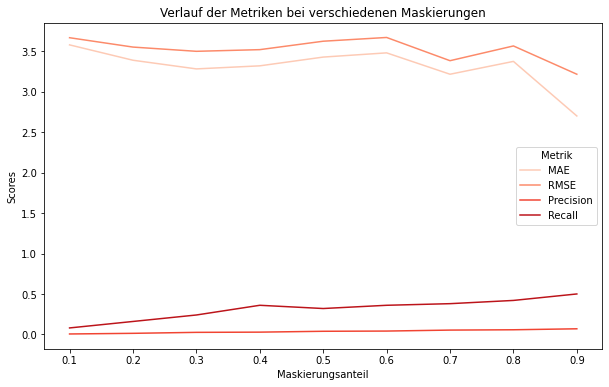

,Threshold,MAE,RMSE,Precision,Recall
0,0.1,3.579228,3.667727,0.005333,0.08
1,0.2,3.389282,3.552055,0.013333,0.16
2,0.3,3.282253,3.499652,0.025333,0.24
3,0.4,3.320069,3.520258,0.028000,0.36
4,0.5,3.428310,3.624419,0.038667,0.32
5,0.6,3.480471,3.670824,0.041333,0.36
6,0.7,3.216291,3.383640,0.053333,0.38
7,0.8,3.374975,3.565916,0.057333,0.42
8,0.9,2.700245,3.216400,0.069333,0.50


In [114]:
# Ausprobieren
mask_evaluation_loop(smaller_matrix.values)

*Diskussion des Plots*: Am besten schneidet bei der kleinen Matrix der maskierte Anteil von 0.9 an, was klar ist, denn wenn ich ein Modell mit 9/10 der Daten trainiere, wird das Ergebnis sehr gut, aber es besteht die Gefahr eines Overfittings. Deshalb wähle ich 0.3 als Mask, da das auch einen tiefen Wert hat. 

In [115]:
class RecommenderEvaluator:
    def __init__(self, matrix, metrics=None, num_iterations=5, test_ratio=0.3):
        self.matrix = matrix
        self.num_iterations = num_iterations
        self.test_ratio = test_ratio
        self.metrics = metrics or ['mae', 'rmse', 'precision', 'recall']
        self.results = {metric: [] for metric in self.metrics}

    def calculate_mae(self, predictions, true_ratings, mask):
        errors = predictions[mask] - true_ratings[mask]
        return np.mean(np.abs(errors))

    def calculate_rmse(self, predictions, true_ratings, mask):
        errors = predictions[mask] - true_ratings[mask]
        return np.sqrt(np.mean(errors ** 2))

    def calculate_precision(self, predictions, true_ratings, n=15, threshold=3.5):
        precision_scores = []
        for user_idx in range(predictions.shape[0]):
            user_predictions = predictions[user_idx, :]
            user_true_ratings = true_ratings[user_idx, :]
            relevant_items = user_true_ratings >= threshold
            top_n_indices = np.argsort(user_predictions)[-n:]
            selected_relevant = relevant_items[top_n_indices]
            precision = selected_relevant.sum() / min(n, relevant_items.sum()) if relevant_items.sum() > 0 else 0
            precision_scores.append(precision)
        return np.mean(precision_scores)

    def calculate_recall(self, predictions, true_ratings, n=15, threshold=3.5):
        recall_scores = []
        for user_idx in range(predictions.shape[0]):
            user_predictions = predictions[user_idx, :]
            user_true_ratings = true_ratings[user_idx, :]
            relevant_items = user_true_ratings >= threshold
            top_n_indices = np.argsort(user_predictions)[-n:]
            selected_relevant = relevant_items[top_n_indices]
            recall = selected_relevant.sum() / relevant_items.sum() if relevant_items.sum() > 0 else 0
            recall_scores.append(recall)
        return np.mean(recall_scores)
    
    def evaluate_predictions(self, predictions, mask):
        if 'mae' in self.metrics:
            self.results['mae'].append(self.calculate_mae(predictions, self.matrix, mask))
        if 'rmse' in self.metrics:
            self.results['rmse'].append(self.calculate_rmse(predictions, self.matrix, mask))
        if 'precision' in self.metrics:
            self.results['precision'].append(self.calculate_precision(predictions, self.matrix))
        if 'recall' in self.metrics:
            self.results['recall'].append(self.calculate_recall(predictions, self.matrix))

    def evaluation_loop(self):
        for _ in range(self.num_iterations):
            mask = np.random.rand(*self.matrix.shape) < self.test_ratio
            train_matrix = self.matrix.copy()
            train_matrix[mask] = 0
            test_matrix = np.zeros_like(self.matrix)
            test_matrix[mask] = self.matrix[mask]
            
            predictor, predict_all = baseline_predictor(train_matrix)
            all_predictions = predict_all()
            
            if 'mae' in self.metrics:
                self.results['mae'].append(self.calculate_mae(all_predictions, self.matrix, mask))
            if 'rmse' in self.metrics:
                self.results['rmse'].append(self.calculate_rmse(all_predictions, self.matrix, mask))
            if 'precision' in self.metrics:
                self.results['precision'].append(self.calculate_precision(all_predictions, self.matrix))
            if 'recall' in self.metrics:
                self.results['recall'].append(self.calculate_recall(all_predictions, self.matrix))

    def plot_results(self):
        scores_df = pd.DataFrame(self.results)
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=scores_df, palette=["salmon"] * len(self.metrics))
        plt.title('Evaluation Metrics')
        plt.xlabel('Metriken')
        plt.ylabel('Scores')
        plt.show()

### Exercise 4 - Optimize hyperparameters of baseline RS (4 points)
Optimize the hyperparameters $\beta_u$ and $\beta_i$ for the baseline RS from exercise 2 using the RMSE metric. You can use the `GridSearchCV` class from scikit-learn to perform the grid search. To save computation time find a reasonable maximum value for the betas. Explain your approach and your solution.
Plot the RMSE as a function of the betas and output all metrics implemented in exercise 3 achieved at the best RMSE value.

In [116]:
def optimize_betas(matrix, beta_u_values, beta_i_values, evaluator):
    results = {'beta_u': [], 'beta_i': [], 'rmse': []}
    best_beta_u, best_beta_i = None, None
    best_rmse = float('inf')

    for beta_u in beta_u_values:
        for beta_i in beta_i_values:
            mask = np.random.rand(*matrix.shape) < evaluator.test_ratio
            train_matrix = matrix.copy()
            train_matrix[mask] = 0

            predictor, predict_all = baseline_predictor(train_matrix, beta_u=beta_u, beta_i=beta_i)

            predicted_matrix = predict_all()

            evaluator.results = {metric: [] for metric in evaluator.metrics}
            evaluator.evaluate_predictions(predicted_matrix, mask)
            rmse = np.mean(evaluator.results['rmse'])

            results['beta_u'].append(beta_u)
            results['beta_i'].append(beta_i)
            results['rmse'].append(rmse)

            if rmse < best_rmse:
                best_rmse = rmse
                best_beta_u = beta_u
                best_beta_i = beta_i

    # Plot
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=results_df, x='beta_u', y='beta_i', size='rmse', hue='rmse', palette='coolwarm', sizes=(40, 200))
    plt.title('Optimierung von Beta-Parametern für Baseline-Predictor')
    plt.xlabel('Beta_u')
    plt.ylabel('Beta_i')
    plt.grid(True)
    plt.show()

    print(f'Optimale Beta-Werte: beta_u={best_beta_u}, beta_i={best_beta_i} mit RMSE: {best_rmse:.4f}')
    return best_beta_u, best_beta_i

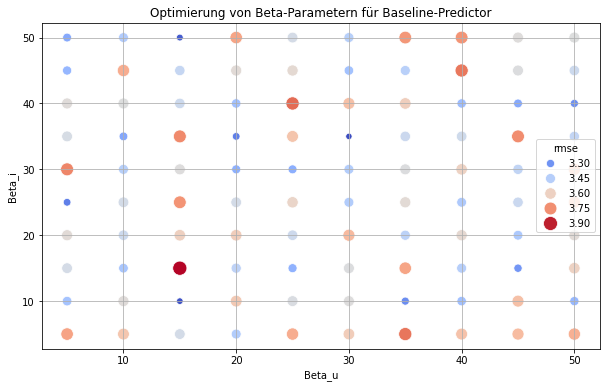

Optimale Beta-Werte: beta_u=30, beta_i=35 mit RMSE: 3.1745


In [117]:
np.random.seed(42)
smaller_matrix_np = np.array(smaller_matrix)
evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, metrics=['rmse'], num_iterations=1, test_ratio=0.3)

beta_u_values = np.arange(5, 55, 5)
beta_i_values = np.arange(5, 55, 5)

best_beta_u, best_beta_i = optimize_betas(smaller_matrix_np, beta_u_values, beta_i_values, evaluator)

In [118]:
# Betas optimieren

def optimize_betas(matrix, beta_u_values, beta_i_values, evaluator):
    results_u = []
    results_i = []

    best_rmse_u = float('inf')
    best_rmse_i = float('inf')
    best_beta_u = None
    best_beta_i = None

    for beta_u in beta_u_values:
        mask = np.random.rand(*matrix.shape) < evaluator.test_ratio
        train_matrix = matrix.copy()
        train_matrix[mask] = 0

        predictor, predict_all = baseline_predictor(train_matrix, beta_u=beta_u, beta_i=20)
        predicted_matrix = predict_all()

        evaluator.results = {metric: [] for metric in evaluator.metrics}
        evaluator.evaluate_predictions(predicted_matrix, mask)
        rmse = np.mean(evaluator.results['rmse'])

        results_u.append((beta_u, rmse))

        if rmse < best_rmse_u:
            best_rmse_u = rmse
            best_beta_u = beta_u

    for beta_i in beta_i_values:
        mask = np.random.rand(*matrix.shape) < evaluator.test_ratio
        train_matrix = matrix.copy()
        train_matrix[mask] = 0

        predictor, predict_all = baseline_predictor(train_matrix, beta_u=20, beta_i=beta_i)
        predicted_matrix = predict_all()

        evaluator.results = {metric: [] for metric in evaluator.metrics}
        evaluator.evaluate_predictions(predicted_matrix, mask)
        rmse = np.mean(evaluator.results['rmse'])

        results_i.append((beta_i, rmse))

        if rmse < best_rmse_i:
            best_rmse_i = rmse
            best_beta_i = beta_i

    df_u = pd.DataFrame(results_u, columns=['beta_u', 'rmse'])
    df_i = pd.DataFrame(results_i, columns=['beta_i', 'rmse'])

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_u, x='beta_u', y='rmse', label='Beta_u', marker='o', color='maroon')
    sns.lineplot(data=df_i, x='beta_i', y='rmse', label='Beta_i', marker='o', color='salmon')
    plt.title('Optimierung der Beta-Werte für den Baseline-Predictor')
    plt.xlabel('Wert von Beta')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f'Optimale Werte: beta_u={best_beta_u} mit RMSE: {best_rmse_u:.4f}, beta_i={best_beta_i} mit RMSE: {best_rmse_i:.4f}')
    return best_beta_u, best_beta_i


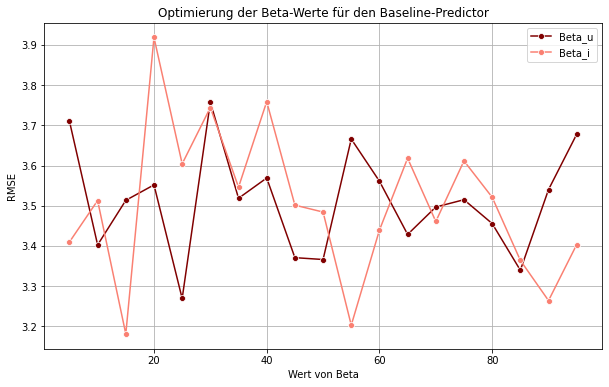

Optimale Werte: beta_u=25 mit RMSE: 3.2693, beta_i=15 mit RMSE: 3.1810


In [119]:
# Anwenden
np.random.seed(42)
smaller_matrix_np = np.array(smaller_matrix)
evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, metrics=['rmse'], num_iterations=1, test_ratio=0.3)

# Beta-Werte festlegen und optimieren
beta_u_values = np.arange(5, 100, 5)
beta_i_values = np.arange(5, 100, 5)

best_beta_u, best_beta_i = optimize_betas(smaller_matrix_np, beta_u_values, beta_i_values, evaluator)

### Exercise 5 - Collaborative filtering item based and user based (10 points)
In this exersise we will build several different collaborative-filtering RS based on nearest neighbour technique, both in terms of item and user. 

Implement:
1. a RS based on the $K$ most similar items (K nearest neighbours). Similarity shall be calculated based on *cosine similarity*. 
2. a RS based on the $K$ most similar items (K nearest neighbours). Similarity shall be calculated based on *Pearson Correlation Coefficienct*. 
3. a RS based on the $K$ most similar users (K nearest neighbours). Similarity shall be calculated based on *cosine similarity*. 
4. a RS based on the $K$ most similar users (K nearest neighbours). Similarity shall be calculated based on *Pearson Correlation Coefficienct*. 

Each should have a default $K$ of 30.

Describe the two similarity metrics.


In [120]:
# Basis aus Cédrics ALA Skript, Ähnlichkeiten berechnen
def cosine_similarity(matrix):
    norm_matrix = matrix - matrix.mean(axis=1, keepdims=True)
    norm_matrix = norm_matrix / np.linalg.norm(norm_matrix, axis=1, keepdims=True)
    similarity = np.dot(norm_matrix, norm_matrix.T)
    return similarity

def pearson_correlation(matrix):
    matrix_mittelwert = matrix - np.mean(matrix, axis=1, keepdims=True)
    standartabweichung = np.std(matrix, axis=1, keepdims=True)
    matrix_normalized = matrix_mittelwert / standartabweichung
    correlation = np.dot(matrix_normalized, matrix_normalized.T)
    return correlation

In [121]:
# k most similar items based on cosine similarity
def knn_items_cosine(matrix, k=30):
    def cosine_similarity(data):
        data_mean = np.mean(data, axis=1, keepdims=True)
        data_norm = data - data_mean
        norm = np.linalg.norm(data_norm, axis=1, keepdims=True)
        norm[norm == 0] = 1
        data_norm /= norm
        return np.dot(data_norm, data_norm.T)

    similarity = cosine_similarity(matrix.T)

    def predict(user_index, item_index):
        similar_items = np.argsort(-similarity[item_index])[:k]
        ratings = matrix[user_index, similar_items]
        return np.mean(ratings[ratings > 0]) if len(ratings[ratings > 0]) > 0 else 0

    return predict

In [122]:
# Ausprobieren
predict_func = knn_items_cosine(smaller_matrix.values)
prediction = predict_func(0, 1)  # User 1, Item 2
print(prediction)

4.0


In [123]:
# k most similar items based on Pearson Correlation Coefficienct
def knn_items_pearson(matrix, k=30):
    def pearson_correlation(data):
        mean_subtracted = data - np.mean(data, axis=1, keepdims=True)
        stddev = np.std(data, axis=1, keepdims=True)
        stddev[stddev == 0] = 1
        mean_subtracted /= stddev
        return np.dot(mean_subtracted, mean_subtracted.T)

    similarity = pearson_correlation(matrix.T)

    def predict(user_index, item_index):
        similar_items = np.argsort(-similarity[item_index])[:k]
        ratings = matrix[user_index, similar_items]
        return np.mean(ratings[ratings > 0]) if len(ratings[ratings > 0]) > 0 else 0

    return predict

In [124]:
# Ausprobieren 
predict_func = knn_items_pearson(smaller_matrix.values)
prediction = predict_func(0, 1)  # User 1, Item 2
print(prediction)

4.0


In [125]:
# k most similar users based on cosine similarity
def knn_users_cosine(matrix, k=30):
    def cosine_similarity(data):
        data_mean = np.mean(data, axis=1, keepdims=True)
        data_norm = data - data_mean
        norm = np.linalg.norm(data_norm, axis=1, keepdims=True)
        norm[norm == 0] = 1
        data_norm /= norm
        return np.dot(data_norm, data_norm.T)

    similarity = cosine_similarity(matrix)

    def predict(user_index, item_index):
        similar_users = np.argsort(-similarity[user_index])[:k]
        ratings = matrix[similar_users, item_index]
        return np.mean(ratings[ratings > 0]) if len(ratings[ratings > 0]) > 0 else 0

    return predict

In [126]:
# Ausprobieren
predict_func = knn_users_cosine(smaller_matrix.values)
prediction = predict_func(0, 1)  # User 1, Item 2
print(prediction)

4.0


In [127]:
# k most similar users based on pearson similarity
def knn_users_pearson(matrix, k=30):
    def pearson_correlation(data):
        mean_subtracted = data - np.mean(data, axis=1, keepdims=True)
        stddev = np.std(data, axis=1, keepdims=True)
        stddev[stddev == 0] = 1
        mean_subtracted /= stddev
        return np.dot(mean_subtracted, mean_subtracted.T)

    similarity = pearson_correlation(matrix)

    def predict(user_index, item_index):
        similar_users = np.argsort(-similarity[user_index])[:k]
        ratings = matrix[similar_users, item_index]
        return np.mean(ratings[ratings > 0]) if len(ratings[ratings > 0]) > 0 else 0

    return predict

In [128]:
# Ausprobieren
predict_func = knn_users_pearson(smaller_matrix.values)
prediction = predict_func(0, 1)
print(prediction)

4.0


Ab hier spiele ich ein bisschen damit herum

In [129]:
class KNN_Recommender:
    def __init__(self, matrix, k=30):
        self.matrix = matrix
        self.k = k  

    def cosine_similarity(self, data):
        data_norm = data - data.mean(axis=1, keepdims=True)
        norm = np.linalg.norm(data_norm, axis=1, keepdims=True)
        norm[norm == 0] = 1
        data_norm /= norm
        return np.dot(data_norm, data_norm.T)

    def pearson_correlation(self, data):
        mean_subtracted = data - np.mean(data, axis=1, keepdims=True)
        stddev = np.std(data, axis=1, keepdims=True)
        stddev[stddev == 0] = 1
        mean_subtracted /= stddev
        correlation = np.dot(mean_subtracted, mean_subtracted.T)
        count = np.ones((data.shape[0], 1)) * data.shape[1]
        correlation /= count
        return correlation

    def fit(self):
        self.users_similarity = {
            'cosine': self.cosine_similarity(self.matrix),
            'pearson': self.pearson_correlation(self.matrix)
        }
        self.items_similarity = {
            'cosine': self.cosine_similarity(self.matrix.T),
            'pearson': self.pearson_correlation(self.matrix.T)
        }

    def predict(self, user_index, item_index, method='cosine', based_on='items'):
        if based_on == 'items':
            similarities = self.items_similarity[method][item_index]
        else:
            similarities = self.users_similarity[method][user_index]

        top_k_indices = np.argsort(-similarities)[:self.k]
        
        if based_on == 'items':
            ratings = self.matrix[:, item_index]
        else:
            ratings = self.matrix[user_index, :]

        top_k_ratings = ratings[top_k_indices]

        return np.mean(top_k_ratings)

In [130]:
# Ausprobieren: 
recommender = KNN_Recommender(smaller_matrix.values)
recommender.fit()
print("Predicted rating for user 1 item 1 based on items and cosine similarity:", recommender.predict(1, 1, 'cosine', 'items'))

Predicted rating for user 1 item 1 based on items and cosine similarity: 0.8


In [131]:
# Erweiterung um Plot
class KNN_Recommender:
    def __init__(self, matrix, k=30): 
        self.matrix = matrix
        self.k = k  
        self.users_similarity = None
        self.items_similarity = None
        self.fit()

    def cosine_similarity(self, data):
        if isinstance(data, pd.DataFrame):
            data = data.to_numpy()
        data_mean = np.mean(data, axis=1, keepdims=True)  
        data_norm = data - data_mean
        norm = np.linalg.norm(data_norm, axis=1, keepdims=True)
        norm[norm == 0] = 1  
        data_norm /= norm
        return np.dot(data_norm, data_norm.T)


    def pearson_correlation(self, data):
        if isinstance(data, pd.DataFrame):
            data = data.to_numpy()
        mean_subtracted = data - np.mean(data, axis=1).reshape(-1, 1)
        stddev = np.std(data, axis=1).reshape(-1, 1)
        stddev[stddev == 0] = 1
        mean_subtracted /= stddev
        correlation = np.dot(mean_subtracted, mean_subtracted.T)
        count = np.ones((data.shape[0], 1)) * data.shape[1]
        correlation /= count
        return correlation

    def fit(self):
        self.users_similarity = {
            'cosine': self.cosine_similarity(self.matrix),
            'pearson': self.pearson_correlation(self.matrix)
        }
        self.items_similarity = {
            'cosine': self.cosine_similarity(self.matrix.T),
            'pearson': self.pearson_correlation(self.matrix.T)
        }

    def predict(self, user_index, item_index, method='cosine', based_on='items', k=None):
        if k is None:
            k = self.k  
        similarities = self.items_similarity[method][item_index] if based_on == 'items' else self.users_similarity[method][user_index]
        top_k_indices = np.argsort(-similarities)[:k]
        ratings = self.matrix[:, item_index] if based_on == 'items' else self.matrix[user_index, :]
        top_k_ratings = ratings[top_k_indices]
        return np.mean(top_k_ratings)

    def plot_similarity(self, based_on='items', method='cosine'):
        similarity_matrix = self.items_similarity[method] if based_on == 'items' else self.users_similarity[method]
        plt.figure(figsize=(10, 8))
        sns.heatmap(similarity_matrix, annot=False, cmap='rocket', cbar=True)
        plt.title(f'{method.title()} Similarity Matrix ({based_on.capitalize()})')
        plt.xlabel(f'{based_on.capitalize()} Index')
        plt.ylabel(f'{based_on.capitalize()} Index')
        plt.show()

In [132]:
# Ausprobieren
recommender = KNN_Recommender(smaller_matrix.values)
print("Predicted rating for user 1 item 1 based on items and cosine similarity:", recommender.predict(2, 2, k=300))

Predicted rating for user 1 item 1 based on items and cosine similarity: 0.9


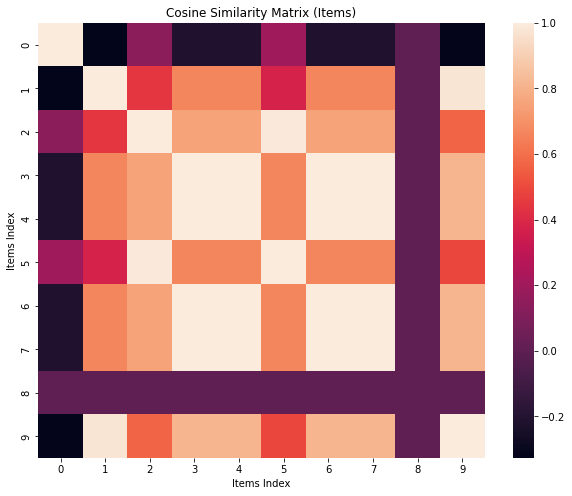

In [133]:
# Ausprobieren
knn_recommender = KNN_Recommender(smaller_matrix.values, k=300)
knn_recommender.plot_similarity(based_on='items', method='cosine')

Description of the two similarity metrics:

Wir haben dieses Thema in ALA bei Cédric angeschaut, das Wissen, wie man das programmiert, habe ich aus dem Skript. 

- Cosine Similarity: Bei der Cosine Similarity werden die Vektoren der Matrix angeschaut und berechnet, wie gross der Winkel zwischen zwei Items oder zwei Usern ist. Wenn sie orthogonal aufeinander liegen, also einen Winkel von 90 Grad haben, sind sich zwei User oder zwei Items nicht ähnlich. Um das zu berechnen, werden die Vektoren vorher normiert und dann wird der Winkel berechnet. 
- Pearson Similarity:Bei Pearson nimmt man zuerst den Mittelwert der Bewertungen für zwei Benutzer oder zwei Items. Danach standardisiert man die Vektoren, indem man von jedem Wert den Mittelwert abzieht, um Abweichungen zu erhalten. Im nächsten Schritt multipliziert man die Abweichungen der entsprechenden Werte der beiden Vektoren. Diese Produkte werden aufsummiert. Das Ergebnis wird dann durch das Produkt der Standardabweichungen beider Vektoren geteilt. 0 heisst keine Ähnlichkeit, 1 heisst zwei Vektoren sind gleich, -1 ist eine umgekehrte Ähnlichkeit.

$$
r_{xy} = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^n (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^n (y_i - \overline{y})^2}}
$$



### Exercise 6 - Optimize hyperparameter $K$ (6 points)
Optimize the hyperparameter $K$ for all RS from the prior exercise optimizing for minimal RMSE. 
For each RS plot RMSE, Precision@N and Recall@N as a function of $K$. 

Compare the results of these four RS on the 3 example users. Do the results match your expectation? Describe.

In [134]:
# Optimierung von den k most similar items mit cosine
def optimize_knn_items_cosine(matrix, k_values, num_iterations=5, n=15, test_ratio=0.3):
    best_k = None
    best_rmse = float('inf')
    results = {'k': [], 'rmse': [], 'precision': [], 'recall': []}

    def knn_items_cosine(matrix, k=30):
        def cosine_similarity(data):
            data_mean = np.mean(data, axis=1, keepdims=True)
            data_norm = data - data_mean
            norm = np.linalg.norm(data_norm, axis=1, keepdims=True)
            norm[norm == 0] = 1
            data_norm /= norm
            return np.dot(data_norm, data_norm.T)

        similarity = cosine_similarity(matrix.T)

        def predict(user_index, item_index):
            similar_items = np.argsort(-similarity[item_index])[:k]
            ratings = matrix[user_index, similar_items]
            return np.mean(ratings[ratings > 0]) if len(ratings[ratings > 0]) > 0 else 0

        return predict

    def calculate_metrics(predictions, true_ratings, mask):
        return (
            calculate_rmse(predictions, true_ratings, mask),
            calculate_precision(predictions, true_ratings, n),
            calculate_recall(predictions, true_ratings, n)
        )

    for k in k_values:
        predict = knn_items_cosine(matrix, k)
        rmse_list = []
        precision_list = []
        recall_list = []

        for _ in range(num_iterations):
            mask = np.random.rand(*matrix.shape) < test_ratio
            train_matrix = matrix.copy()
            train_matrix[mask] = 0

            predictions = np.zeros_like(matrix)
            for user_idx in range(matrix.shape[0]):
                for item_idx in range(matrix.shape[1]):
                    if mask[user_idx, item_idx]:
                        predictions[user_idx, item_idx] = predict(user_idx, item_idx)

            rmse, precision, recall = calculate_metrics(predictions, matrix, mask)
            rmse_list.append(rmse)
            precision_list.append(precision)
            recall_list.append(recall)

        avg_rmse = np.mean(rmse_list)
        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)

        results['k'].append(k)
        results['rmse'].append(avg_rmse)
        results['precision'].append(avg_precision)
        results['recall'].append(avg_recall)

        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_k = k

    colors = ['#FF4500', '#FF6347', '#9400D3']  
    plt.figure(figsize=(14, 6))
    plt.plot(results['k'], results['rmse'], marker='o', label='RMSE', color=colors[0])
    plt.plot(results['k'], results['precision'], marker='o', label='Precision', color=colors[1])
    plt.plot(results['k'], results['recall'], marker='o', label='Recall', color=colors[2])
    plt.xlabel('K-Werte')
    plt.ylabel('Scores')
    plt.title('Optimierung von K-Werten bei den Items mit Cosinus Ähnlichkeit')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Bestes K: {best_k} mit diesem RMSE: {best_rmse}")
    return best_k

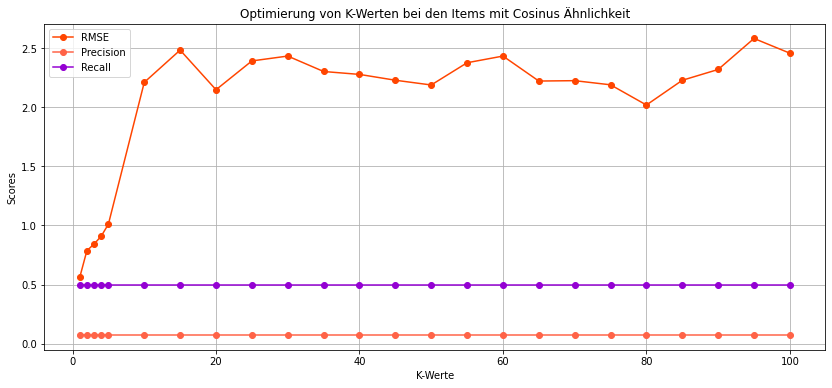

Bestes K: 1 mit diesem RMSE: 0.5598037262050689


In [135]:
# Ausprobieren
smaller_matrix_np = np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
k_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
best_k = optimize_knn_items_cosine(smaller_matrix_np, k_values, num_iterations=5, n=15, test_ratio=0.3)

In [136]:
# Optimierung von den k most similar items mit pearson similarity
def optimize_knn_items_pearson(matrix, k_values, num_iterations=5, n=15, test_ratio=0.3):
    best_k = None
    best_rmse = float('inf')
    results = {'k': [], 'rmse': [], 'precision': [], 'recall': []}

    def knn_items_pearson(matrix, k=30): # VS Code und/oder der Laptop machen teilweise Probleme, wenn ich das nicht drin habe...
        def pearson_correlation(data):
            mean_subtracted = data - np.mean(data, axis=1, keepdims=True)
            stddev = np.std(data, axis=1, keepdims=True)
            stddev[stddev == 0] = 1
            mean_subtracted /= stddev
            return np.dot(mean_subtracted, mean_subtracted.T)

        similarity = pearson_correlation(matrix.T)

        def predict(user_index, item_index):
            similar_items = np.argsort(-similarity[item_index])[:k]
            ratings = matrix[user_index, similar_items]
            return np.mean(ratings[ratings > 0]) if len(ratings[ratings > 0]) > 0 else 0

        return predict

    def calculate_metrics(predictions, true_ratings, mask):
        return (
            calculate_rmse(predictions, true_ratings, mask),
            calculate_precision(predictions, true_ratings, n),
            calculate_recall(predictions, true_ratings, n)
        )

    for k in k_values:
        predict = knn_items_pearson(matrix, k)
        rmse_list = []
        precision_list = []
        recall_list = []

        for _ in range(num_iterations):
            mask = np.random.rand(*matrix.shape) < test_ratio
            train_matrix = matrix.copy()
            train_matrix[mask] = 0

            predictions = np.zeros_like(matrix)
            for user_idx in range(matrix.shape[0]):
                for item_idx in range(matrix.shape[1]):
                    if mask[user_idx, item_idx]:
                        predictions[user_idx, item_idx] = predict(user_idx, item_idx)

            rmse, precision, recall = calculate_metrics(predictions, matrix, mask)
            rmse_list.append(rmse)
            precision_list.append(precision)
            recall_list.append(recall)

        avg_rmse = np.mean(rmse_list)
        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)

        results['k'].append(k)
        results['rmse'].append(avg_rmse)
        results['precision'].append(avg_precision)
        results['recall'].append(avg_recall)

        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_k = k

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(results['k'], results['rmse'], marker='o', label='RMSE', color='#FF4500')
    plt.plot(results['k'], results['precision'], marker='o', label='Precision', color='#FF6347')
    plt.plot(results['k'], results['recall'], marker='o', label='Recall', color='#9400D3')
    plt.xlabel('K-Werte')
    plt.ylabel('Scores')
    plt.title('Optimierung von K-Werten (Pearson Correlation)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Bestes K: {best_k} mit diesem RMSE: {best_rmse}")
    return best_k

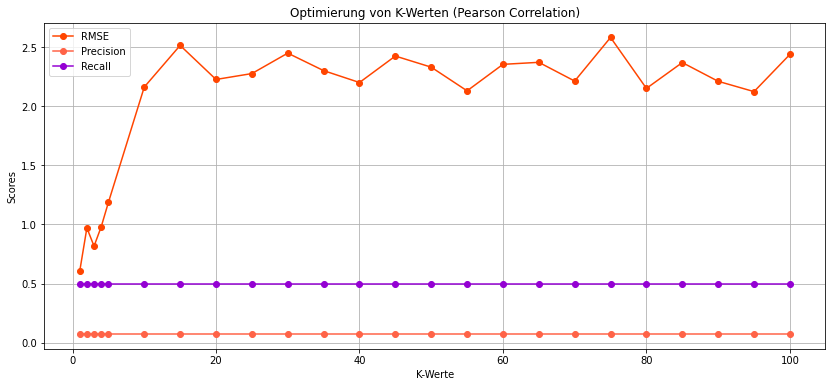

Bestes K: 1 mit diesem RMSE: 0.6034525690097494


In [137]:
# Ausprobieren
smaller_matrix_np = np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
k_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
best_k = optimize_knn_items_pearson(smaller_matrix_np, k_values, num_iterations=5, n=15, test_ratio=0.3)

In [138]:
# Optimierung von den k most similar users mit cosine similarity
def optimize_knn_users_cosine(matrix, k_values, num_iterations=5, n=15, test_ratio=0.3):
    best_k = None
    best_rmse = float('inf')
    results = {'k': [], 'rmse': [], 'precision': [], 'recall': []}

    def knn_users_cosine(matrix, k=30):
        def cosine_similarity(data):
            data_mean = np.mean(data, axis=1, keepdims=True)
            data_norm = data - data_mean
            norm = np.linalg.norm(data_norm, axis=1, keepdims=True)
            norm[norm == 0] = 1
            data_norm /= norm
            return np.dot(data_norm, data_norm.T)

        similarity = cosine_similarity(matrix)

        def predict(user_index, item_index):
            similar_users = np.argsort(-similarity[user_index])[:k]
            ratings = matrix[similar_users, item_index]
            return np.mean(ratings[ratings > 0]) if len(ratings[ratings > 0]) > 0 else 0

        return predict

    def calculate_metrics(predictions, true_ratings, mask):
        return (
            calculate_rmse(predictions, true_ratings, mask),
            calculate_precision(predictions, true_ratings, n),
            calculate_recall(predictions, true_ratings, n)
        )

    for k in k_values:
        predict = knn_users_cosine(matrix, k)
        rmse_list = []
        precision_list = []
        recall_list = []

        for _ in range(num_iterations):
            mask = np.random.rand(*matrix.shape) < test_ratio
            train_matrix = matrix.copy()
            train_matrix[mask] = 0

            predictions = np.zeros_like(matrix)
            for user_idx in range(matrix.shape[0]):
                for item_idx in range(matrix.shape[1]):
                    if mask[user_idx, item_idx]:
                        predictions[user_idx, item_idx] = predict(user_idx, item_idx)

            rmse, precision, recall = calculate_metrics(predictions, matrix, mask)
            rmse_list.append(rmse)
            precision_list.append(precision)
            recall_list.append(recall)

        avg_rmse = np.mean(rmse_list)
        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)

        results['k'].append(k)
        results['rmse'].append(avg_rmse)
        results['precision'].append(avg_precision)
        results['recall'].append(avg_recall)

        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_k = k

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(results['k'], results['rmse'], marker='o', label='RMSE', color='#FF4500')
    plt.plot(results['k'], results['precision'], marker='o', label='Precision', color='#FF6347')
    plt.plot(results['k'], results['recall'], marker='o', label='Recall', color='#9400D3')
    plt.xlabel('K-Werte')
    plt.ylabel('Scores')
    plt.title('Optimierung von K-Werten (User-based Cosine Similarity)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Bestes K: {best_k} mit diesem RMSE: {best_rmse}")
    return best_k

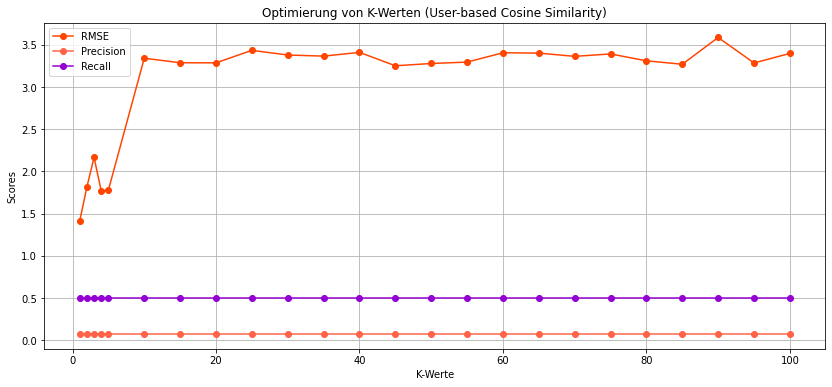

Bestes K: 1 mit diesem RMSE: 1.4129339919161035


In [139]:
# Ausprobieren
smaller_matrix_np = np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
k_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
best_k = optimize_knn_users_cosine(smaller_matrix_np, k_values, num_iterations=5, n=15, test_ratio=0.3)

*Diskussion des Plots*: Interessant, hier ist das beste k = 2, nicht 1 wie bei den Items. 

In [140]:
# Optimierung von den k most similar users mit pearson similarity
def optimize_k_knn_users_pearson(matrix, k_values, num_iterations=5, n=15, test_ratio=0.3):
    best_k = None
    best_rmse = float('inf')
    results = {'k': [], 'rmse': [], 'precision': [], 'recall': []}

    def knn_users_pearson(matrix, k=30):
        def pearson_correlation(data):
            mean_subtracted = data - np.mean(data, axis=1, keepdims=True)
            stddev = np.std(data, axis=1, keepdims=True)
            stddev[stddev == 0] = 1
            mean_subtracted /= stddev
            return np.dot(mean_subtracted, mean_subtracted.T)

        similarity = pearson_correlation(matrix)

        def predict(user_index, item_index):
            similar_users = np.argsort(-similarity[user_index])[:k]
            ratings = matrix[similar_users, item_index]
            return np.mean(ratings[ratings > 0]) if len(ratings[ratings > 0]) > 0 else 0

        return predict

    def calculate_metrics(predictions, true_ratings, mask):
        return (
            calculate_rmse(predictions, true_ratings, mask),
            calculate_precision(predictions, true_ratings, n),
            calculate_recall(predictions, true_ratings, n)
        )

    for k in k_values:
        predict = knn_users_pearson(matrix, k)
        rmse_list = []
        precision_list = []
        recall_list = []

        for _ in range(num_iterations):
            mask = np.random.rand(*matrix.shape) < test_ratio
            train_matrix = matrix.copy()
            train_matrix[mask] = 0

            predictions = np.zeros_like(matrix)
            for user_idx in range(matrix.shape[0]):
                for item_idx in range(matrix.shape[1]):
                    if mask[user_idx, item_idx]:
                        predictions[user_idx, item_idx] = predict(user_idx, item_idx)

            rmse, precision, recall = calculate_metrics(predictions, matrix, mask)
            rmse_list.append(rmse)
            precision_list.append(precision)
            recall_list.append(recall)

        avg_rmse = np.mean(rmse_list)
        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)

        results['k'].append(k)
        results['rmse'].append(avg_rmse)
        results['precision'].append(avg_precision)
        results['recall'].append(avg_recall)

        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_k = k

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(results['k'], results['rmse'], marker='o', label='RMSE', color='#FF4500')
    plt.plot(results['k'], results['precision'], marker='o', label='Precision', color='#FF6347')
    plt.plot(results['k'], results['recall'], marker='o', label='Recall', color='#9400D3')
    plt.xlabel('K-Werte')
    plt.ylabel('Scores')
    plt.title('Optimierung von K-Werten nach User basierend auf Pearson Similarity)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best K: {best_k} with RMSE: {best_rmse}")
    return best_k

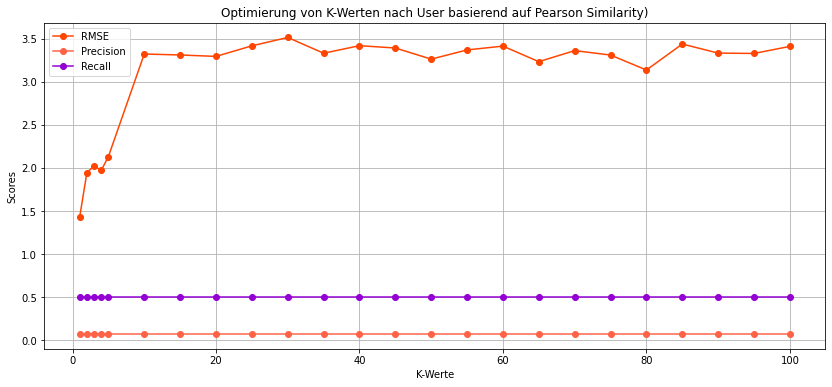

Best K: 1 with RMSE: 1.431601364736883


In [141]:
# Ausprobieren
smaller_matrix_np = np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
k_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
best_k = optimize_k_knn_users_pearson(smaller_matrix_np, k_values, num_iterations=5, n=15, test_ratio=0.3)

*Diskussion des Plots*: Hier ist das beste k wieder 1.

Jetzt werden die vier Recommender Systems für die User 1, 2 und 3 für das Item 1 genutzt mit einem k von 1 bzw. 2

In [142]:
# Nach items und cosine similarity
smaller_matrix_np = np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
predict_item = knn_items_cosine(smaller_matrix_np, k=1)

users = [1, 2, 3]  
item = 1  

for user in users:
    prediction = predict_item(user, item)
    print(f"Prediction for user {user} and item {item}: {prediction:.2f}")

Prediction for user 1 and item 1: 0.00
Prediction for user 2 and item 1: 0.00
Prediction for user 3 and item 1: 0.00


In [143]:
# Nach items und pearson similarity
smaller_matrix_np = np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
predict_item = knn_items_pearson(smaller_matrix_np, k=1)

users = [1, 2, 3]  
item = 1  

for user in users:
    prediction = predict_item(user, item)
    print(f"Prediction for user {user} and item {item}: {prediction:.2f}")

Prediction for user 1 and item 1: 0.00
Prediction for user 2 and item 1: 0.00
Prediction for user 3 and item 1: 0.00


In [144]:
# Nach users und cosine similarity
smaller_matrix_np = np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
predict_item = knn_users_cosine(smaller_matrix_np, k=2)

users = [1, 2, 3]  
item = 1  

for user in users:
    prediction = predict_item(user, item)
    print(f"Prediction for user {user} and item {item}: {prediction:.2f}")

Prediction for user 1 and item 1: 0.00
Prediction for user 2 and item 1: 0.00
Prediction for user 3 and item 1: 0.00


In [145]:
# Nach users und pearson similarity
smaller_matrix_np = np.array(user_item_matrix) # Weil VS Code sonst Probleme macht
predict_item = knn_users_pearson(smaller_matrix_np, k=1)

users = [1, 2, 3]  
item = 1  

for user in users:
    prediction = predict_item(user, item)
    print(f"Prediction for user {user} and item {item}: {prediction:.2f}")

Prediction for user 1 and item 1: 0.00
Prediction for user 2 and item 1: 0.00
Prediction for user 3 and item 1: 0.00


Ab hier habe ich die Werte der Klasse von vorhin optimiert.

In [146]:
def cosine_similarity(self, data):
    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()
    
    data_mean = np.mean(data, axis=1).reshape(-1, 1)  
    data_norm = data - data_mean
    norm = np.linalg.norm(data_norm, axis=1).reshape(-1, 1)
    norm[norm == 0] = 1
    data_norm /= norm
    return np.dot(data_norm, data_norm.T)

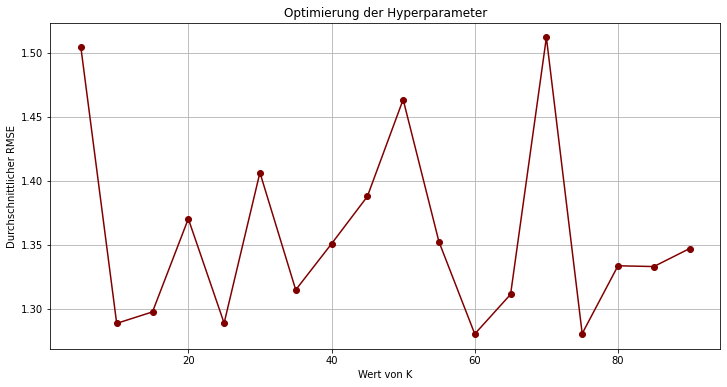

In [147]:
# k-Werte
k_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
rmse_results = []

np.random.seed(42)

for k in k_values:
    smaller_matrix_np = np.array(smaller_matrix)

    knn = KNN_Recommender(matrix=smaller_matrix_np, k=k)
    knn.fit()

    evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, num_iterations=10)

    current_rmse_results = []

    for _ in range(evaluator.num_iterations):
        mask = np.random.rand(*smaller_matrix_np.shape) < evaluator.test_ratio

        train_matrix = smaller_matrix_np.copy()
        train_matrix[mask] = 0  

        test_matrix = np.zeros_like(smaller_matrix_np)

        for row in range(smaller_matrix_np.shape[0]):
            test_matrix[row, mask[row, :]] = smaller_matrix_np[row, mask[row, :]]

        predictions = np.zeros_like(smaller_matrix_np)
        for user_index in range(smaller_matrix_np.shape[0]):
            for item_index in range(smaller_matrix_np.shape[1]):
                if mask[user_index, item_index]:
                    predictions[user_index, item_index] = knn.predict(
                        user_index, item_index, method='cosine', based_on='items'
                    )

        current_rmse = evaluator.calculate_rmse(predictions, smaller_matrix_np, mask)
        current_rmse_results.append(current_rmse)

    rmse_results.append(np.mean(current_rmse_results))

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(k_values, rmse_results, marker='o', linestyle='-', color='maroon')
plt.title('Optimierung der Hyperparameter')
plt.xlabel('Wert von K')
plt.ylabel('Durchschnittlicher RMSE')
plt.grid(True)
plt.show()


*Diskussion des Plots*: Vielleicht ist es ein lokales Tief. Ich verwende weitere Werte, aber bei diesem Plot zeigt es mir, dass der optimale Wert bei k=80 liegt. 

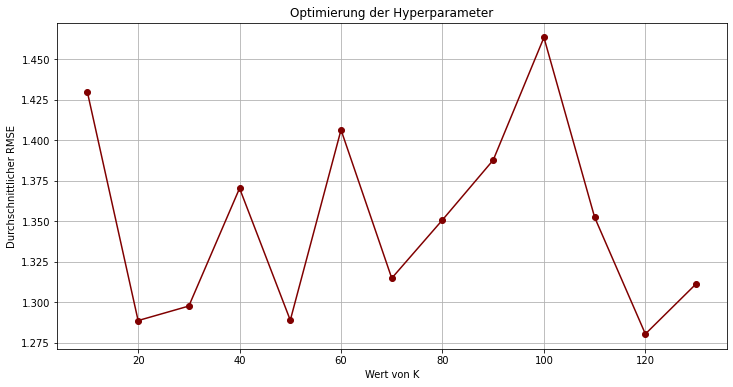

In [148]:
k_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
rmse_results = []

np.random.seed(42)  

for k in k_values:
    smaller_matrix_np = np.array(smaller_matrix)

    knn = KNN_Recommender(matrix=smaller_matrix_np, k=k)
    knn.fit()

    evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, num_iterations=10)

    current_rmse_results = []

    for _ in range(evaluator.num_iterations):
        mask = np.random.rand(*smaller_matrix_np.shape) < evaluator.test_ratio

        train_matrix = smaller_matrix_np.copy()
        train_matrix[mask] = 0  

        test_matrix = np.zeros_like(smaller_matrix_np)

        for row in range(smaller_matrix_np.shape[0]):
            test_matrix[row, mask[row, :]] = smaller_matrix_np[row, mask[row, :]]

        predictions = np.zeros_like(smaller_matrix_np)
        for user_index in range(smaller_matrix_np.shape[0]):
            for item_index in range(smaller_matrix_np.shape[1]):
                if mask[user_index, item_index]:
                    predictions[user_index, item_index] = knn.predict(
                        user_index, item_index, method='cosine', based_on='items'
                    )

        current_rmse = evaluator.calculate_rmse(predictions, smaller_matrix_np, mask)
        current_rmse_results.append(current_rmse)

    rmse_results.append(np.mean(current_rmse_results))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(k_values, rmse_results, marker='o', linestyle='-', color='maroon')
plt.title('Optimierung der Hyperparameter')
plt.xlabel('Wert von K')
plt.ylabel('Durchschnittlicher RMSE')
plt.grid(True)
plt.show()

*Diskussion des Plots*: Ich hatte unrecht mit meiner Vermutung. k=120 ergibt einen noch tieferen RMSE. Ich probiere es noch ein bisschen weiter. 

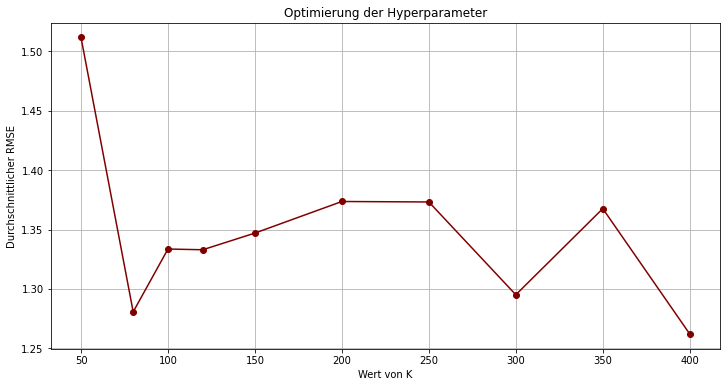

In [149]:
k_values = [50, 80, 100, 120, 150, 200, 250, 300, 350, 400]
rmse_results = []

for k in k_values:
    smaller_matrix_np = np.array(smaller_matrix)

    knn = KNN_Recommender(matrix=smaller_matrix_np, k=k)
    knn.fit()

    evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, num_iterations=10)

    current_rmse_results = []

    for _ in range(evaluator.num_iterations):
        mask = np.random.rand(*smaller_matrix_np.shape) < evaluator.test_ratio

        train_matrix = smaller_matrix_np.copy()
        train_matrix[mask] = 0  

        test_matrix = np.zeros_like(smaller_matrix_np)

        for row in range(smaller_matrix_np.shape[0]):
            test_matrix[row, mask[row, :]] = smaller_matrix_np[row, mask[row, :]]

        predictions = np.zeros_like(smaller_matrix_np)
        for user_index in range(smaller_matrix_np.shape[0]):
            for item_index in range(smaller_matrix_np.shape[1]):
                if mask[user_index, item_index]:
                    predictions[user_index, item_index] = knn.predict(
                        user_index, item_index, method='cosine', based_on='items'
                    )

        current_rmse = evaluator.calculate_rmse(predictions, smaller_matrix_np, mask)
        current_rmse_results.append(current_rmse)

    rmse_results.append(np.mean(current_rmse_results))

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(k_values, rmse_results, marker='o', linestyle='-', color='maroon')
plt.title('Optimierung der Hyperparameter')
plt.xlabel('Wert von K')
plt.ylabel('Durchschnittlicher RMSE')
plt.grid(True)
plt.show()

*Diskussion des Plots*: Der RMSE ist bei k=300 am tiefsten, also nehme ich diesen Wert als K. 

### Excercise 7 - Model-based RS: SVD (6 points)
In this exercise we will use the unsupervised method *singular value decomposition (SVD)* from the python package *surprise* (https://surpriselib.com, documentation https://surprise.readthedocs.io/en/stable/matrix_factorization.html) or the R package *recommenderlab*. SVD can compress much of the information of a matrix in few components.  

Run the SVD RS and show the results on the three example users from exercise 2. Explain how this algorithm works.

Note: A very good general introduction to SVD is this youtube video series starting with https://www.youtube.com/watch?v=gXbThCXjZFM&t=337s . See *Collaborative filtering recommender systems* by Ekstrand et al. *Mining of massive datasets* by Leskovec, Kapitel 11 (2020) and ,*Recommender systems: The textbook*, by Aggarwal, chapter 3

Ich verwende hier die Informationen und Vorgehen aus Cédrics ALA Skript. So funktioniert der SVD-Algorithmus: Zuerst wird aus der Originalmatrix drei Matrizen gemacht: Sigma, U und V_T. Die Matrix U beschreibt die Zeilenbeziehungen, während V_T die Verbindungen zwischen den Spalten ist. Sigma ist eine diagonale Matrix, die die Singularwerte enthält. Bei RS bringt SVD, eine grosse Benutzer-Item-Matrix auf eine kompaktere Form zu reduzieren, indem sie die wichtigsten latenten Faktoren weglässt, also die unteren Zeilen, die die beliebten Items der Benutzer und die Eigenschaften der Produkte darstellen. So kann man einfacher ein Muster erkennen. 

In [150]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

smaller_matrix_np = np.array(smaller_matrix) # Weil VS Code sonst Probleme macht

# DataFrame erstellen
num_users, num_items = smaller_matrix_np.shape
data = {
    'user_id': np.repeat(np.arange(num_users), num_items),
    'item_id': np.tile(np.arange(num_items), num_users),
    'rating': smaller_matrix_np.flatten()
}
df = pd.DataFrame(data)

# Daten vorbereiten
reader = Reader(rating_scale=(np.min(smaller_matrix_np), np.max(smaller_matrix_np)))
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# Trainingsset 
trainset = data.build_full_trainset()

# SVD-Modell trainieren
svd = SVD()
svd.fit(trainset)

# Ausprobieren
user_id = 1
item_id = 1
prediction = svd.predict(user_id, item_id)
print(f"Vorhergesagtes Rating für User {user_id} und Item {item_id}: {prediction.est}")

Vorhergesagtes Rating für User 1 und Item 1: 0.32865741348693756


In [151]:
user_ids = [1, 2, 3]
item_id = 1

for user_id in user_ids:
    prediction = svd.predict(user_id, item_id)
    print(f"Vorhergesagtes Rating für User {user_id} und Item {item_id}: {prediction.est:.2f}")

Vorhergesagtes Rating für User 1 und Item 1: 0.33
Vorhergesagtes Rating für User 2 und Item 1: 0.26
Vorhergesagtes Rating für User 3 und Item 1: 0.24


### Exercise 8 - Optimize hyperparameter $k$ or `n_factors` (4 points)
Optimize the hyperparameter, representing the number of greatest SVD components used for the truncated reconstruction of the user item matrix, to minimize RMSE.
Plot RMSE, Precision@N and Recall@N as a function of this hyperparameter. Finally output all performance metrics from exercise 3 for the found value.

In [152]:
# Optimierung der Anzahl der Faktoren
def optimize_n_factors(matrix, n_factors_values, evaluator):
    best_n_factors = None
    best_rmse = float('inf')
    results = {'n_factors': [], 'mae': [], 'rmse': [], 'precision': [], 'recall': []}

    for n_factors in n_factors_values:
        svd = SVD(n_factors=n_factors)
        evaluator.results = {metric: [] for metric in evaluator.metrics}

        for _ in range(evaluator.num_iterations):
            mask = np.random.rand(*matrix.shape) < evaluator.test_ratio
            train_matrix = matrix.copy()
            train_matrix[mask] = 0

            num_users, num_items = train_matrix.shape
            train_data = {
                'user_id': np.repeat(np.arange(num_users), num_items),
                'item_id': np.tile(np.arange(num_items), num_users),
                'rating': train_matrix.flatten()
            }
            df = pd.DataFrame(train_data)
            reader = Reader(rating_scale=(np.min(matrix), np.max(matrix)))
            train_dataset = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)
            trainset = train_dataset.build_full_trainset()

            svd.fit(trainset)

            predictions = np.zeros_like(matrix)
            for user_idx in range(matrix.shape[0]):
                for item_idx in range(matrix.shape[1]):
                    if mask[user_idx, item_idx]:
                        pred = svd.predict(user_idx, item_idx).est
                        predictions[user_idx, item_idx] = pred

            for metric in evaluator.metrics:
                if metric == 'mae':
                    evaluator.results[metric].append(evaluator.calculate_mae(predictions, matrix, mask))
                elif metric == 'rmse':
                    evaluator.results[metric].append(evaluator.calculate_rmse(predictions, matrix, mask))
                elif metric == 'precision':
                    evaluator.results[metric].append(evaluator.calculate_precision(predictions, matrix))
                elif metric == 'recall':
                    evaluator.results[metric].append(evaluator.calculate_recall(predictions, matrix))

        avg_rmse = np.mean(evaluator.results['rmse'])
        avg_mae = np.mean(evaluator.results['mae'])
        avg_precision = np.mean(evaluator.results['precision'])
        avg_recall = np.mean(evaluator.results['recall'])

        results['n_factors'].append(n_factors)
        results['rmse'].append(avg_rmse)
        results['mae'].append(avg_mae)
        results['precision'].append(avg_precision)
        results['recall'].append(avg_recall)

        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_n_factors = n_factors

    # Plot 
    plt.figure(figsize=(14, 6))
    plt.plot(results['n_factors'], results['rmse'], marker='o', label='RMSE', color='#FF4500')
    plt.plot(results['n_factors'], results['mae'], marker='o', label='MAE', color='#4682B4')
    plt.plot(results['n_factors'], results['precision'], marker='o', label='Precision', color='#FF6347')
    plt.plot(results['n_factors'], results['recall'], marker='o', label='Recall', color='#9400D3')
    plt.xlabel('Anzahl der Faktoren')
    plt.ylabel('Scores')
    plt.title('Optimierung der Anzahl der Faktoren für SVD')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Beste n_factors: {best_n_factors} mit RMSE: {best_rmse:.4f}")
    return best_n_factors

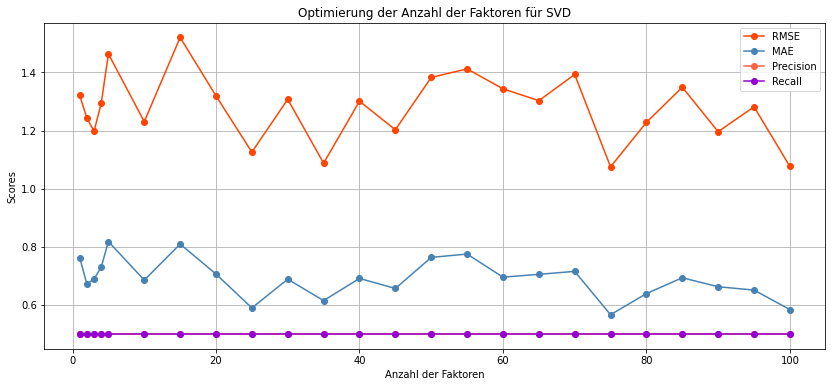

Beste n_factors: 75 mit RMSE: 1.0751


In [153]:
smaller_matrix_np = np.array(smaller_matrix)  # Konvertieren in NumPy
n_factors_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, num_iterations=5, test_ratio=0.3)
best_n_factors = optimize_n_factors(smaller_matrix_np, n_factors_values, evaluator)

Anmerkung: Precision und Recall liegen auf dem gleichen Wert, daher scheint es, als gäbe es nur drei Metriken. 

*Diskussion des Plots*: Der beste n_factor ist also 30. 

In [154]:
# Funktion für n_factors = 60
def evaluate_fixed_n_factors(matrix, n_factors, evaluator):
    svd = SVD(n_factors=n_factors)
    evaluator.results = {metric: [] for metric in evaluator.metrics}

    for _ in range(evaluator.num_iterations):
        mask = np.random.rand(*matrix.shape) < evaluator.test_ratio
        train_matrix = matrix.copy()
        train_matrix[mask] = 0

        num_users, num_items = train_matrix.shape
        train_data = {
            'user_id': np.repeat(np.arange(num_users), num_items),
            'item_id': np.tile(np.arange(num_items), num_users),
            'rating': train_matrix.flatten()
        }
        df = pd.DataFrame(train_data)
        reader = Reader(rating_scale=(np.min(matrix), np.max(matrix)))
        train_dataset = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)
        trainset = train_dataset.build_full_trainset()

        svd.fit(trainset)

        predictions = np.zeros_like(matrix)
        for user_idx in range(matrix.shape[0]):
            for item_idx in range(matrix.shape[1]):
                if mask[user_idx, item_idx]:
                    pred = svd.predict(user_idx, item_idx).est
                    predictions[user_idx, item_idx] = pred

        for metric in evaluator.metrics:
            if metric == 'mae':
                evaluator.results[metric].append(evaluator.calculate_mae(predictions, matrix, mask))
            elif metric == 'rmse':
                evaluator.results[metric].append(evaluator.calculate_rmse(predictions, matrix, mask))
            elif metric == 'precision':
                evaluator.results[metric].append(evaluator.calculate_precision(predictions, matrix))
            elif metric == 'recall':
                evaluator.results[metric].append(evaluator.calculate_recall(predictions, matrix))

    avg_rmse = np.mean(evaluator.results['rmse'])
    avg_mae = np.mean(evaluator.results['mae'])
    avg_precision = np.mean(evaluator.results['precision'])
    avg_recall = np.mean(evaluator.results['recall'])

    print(f"Evaluation für n_factors={n_factors}:")
    print(f"RMSE: {avg_rmse:.4f}")
    print(f"MAE: {avg_mae:.4f}")
    print(f"Precision@15: {avg_precision:.4f}")
    print(f"Recall@15: {avg_recall:.4f}")

# n_factors = 60
smaller_matrix_np = np.array(smaller_matrix)  # Konvertieren in NumPy
evaluator = RecommenderEvaluator(matrix=smaller_matrix_np, num_iterations=5, test_ratio=0.3)
evaluate_fixed_n_factors(smaller_matrix_np, 60, evaluator)


Evaluation für n_factors=60:
RMSE: 1.3258
MAE: 0.7282
Precision@15: 0.5000
Recall@15: 0.5000


### Exercise 9 - Everything goes (30 points)
In this exercise you can explore different methods of RS. You are not limited what methods you apply. You can try to improve the methods from the earlier exercises by adjusting them or generating ensemble or hybrid RS. Also you can train deep neural networks, use NLP methods, use the available links to imdb available in the dataset to further enrich the dataset or find an obscure method by someone else on Github. However document what your inspirations and sources are and your process. Important: If you use the work of someone else you must be able to explain the method conceptually. 
Output the performance metrics of exercise 3.

**Build and optimize at least three different methods.**

In [155]:
# Method 1: Working with tags
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Tags pro Film zusammenfassen
tags_combined = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

# TF-IDF-Vektorisierung
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tags_combined['tag'])

# Ähnlichkeitsmatrix berechnen
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# Mapping von `movieId` zu Index in der Ähnlichkeitsmatrix
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(tags_combined['movieId'])}

# Empfehlungen generieren
def recommend_movies(user_id, ratings, cosine_similarities, movie_id_to_index, top_n=20):
    # Filme finden, die der Benutzer bereits bewertet hat
    user_movies = ratings[ratings['userId'] == user_id]['movieId']
    all_recommendations = []

    for movie_id in user_movies:
        if movie_id in movie_id_to_index:
            cosine_index = movie_id_to_index[movie_id]
            sim_scores = list(enumerate(cosine_similarities[cosine_index]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:top_n + 1]
            all_recommendations.extend([tags_combined['movieId'][i[0]] for i in sim_scores])

    # Zähle die Häufigkeit jedes empfohlenen Films
    recommendation_counts = Counter(all_recommendations)

    # Sortiere nach Häufigkeit und Anzahl
    most_common_recommendations = [movie for movie, _ in recommendation_counts.most_common(top_n)]
    return most_common_recommendations[:20]

# Beispiel: Empfohlene Filme für Benutzer 2
user_id = 2
recommended_movie_ids = recommend_movies(user_id, ratings, cosine_similarities, movie_id_to_index, top_n=20)

# Speichere nur die ersten 20 Empfehlungen in einer Liste
recommendations_for_user_2 = recommended_movie_ids[:15]

# Zeige die Liste der Filme mit ihren Titeln und Genres an
recommended_movies = movies[movies['movieId'].isin(recommendations_for_user_2)]
print(f"Empfohlene Filme für Benutzer {user_id}:\n", recommended_movies[['title']])

Empfohlene Filme für Benutzer 2:
                                                title
0                                          Toy Story
97                                        Braveheart
120                          Basketball Diaries, The
533                                      Primal Fear
809             William Shakespeare's Romeo + Juliet
1298                               Big Lebowski, The
2453  Man Bites Dog (C'est arrivé près de chez vous)
6358                                   Blood Diamond
7258                                  Shutter Island
7372                                       Inception
8757                               The Hateful Eight
8990                                    The Revenant
9245                                  Eye in the Sky
9452                           The Lego Batman Movie
9636                  Jumanji: Welcome to the Jungle


Durchschnittliche Ergebnisse:
mae: 3.3439
rmse: 3.5614
precision: 0.5000
recall: 0.5000


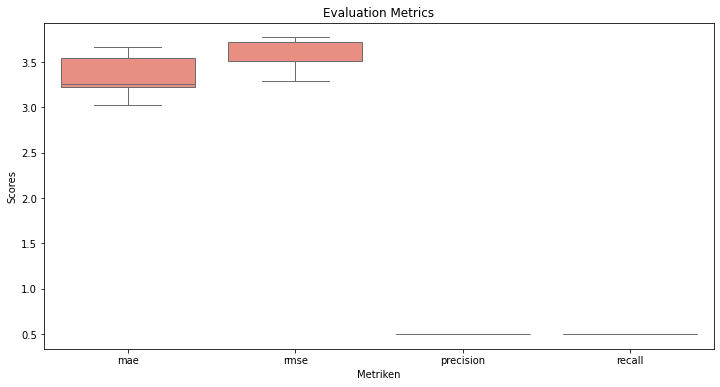

In [156]:
# Metriken für die kleine Matrix
smaller_matrix_np= np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
evaluator = RecommenderEvaluator(smaller_matrix_np, metrics=["mae", "rmse", "precision", "recall"])
evaluator.evaluation_loop()

print("Durchschnittliche Ergebnisse:")
for metric, scores in evaluator.results.items():
    print(f"{metric}: {np.mean(scores):.4f}")

# Plot
evaluator.plot_results()

Durchschnittliche Ergebnisse:
mae: 3.5313
rmse: 3.5706
precision: 0.2914
recall: 0.0711


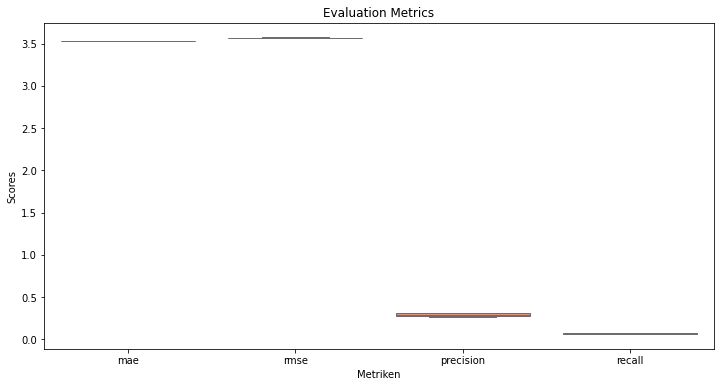

In [157]:
# Metriken für die grosse Matrix
user_item_matrix_np= np.array(user_item_matrix) # Weil VS Code sonst Probleme macht
evaluator = RecommenderEvaluator(user_item_matrix_np, metrics=["mae", "rmse", "precision", "recall"])
evaluator.evaluation_loop()

print("Durchschnittliche Ergebnisse:")
for metric, scores in evaluator.results.items():
    print(f"{metric}: {np.mean(scores):.4f}")

# Plot
evaluator.plot_results()

Durchschnittliche Ergebnisse:
mae: 3.5327
rmse: 3.5719
precision: 0.3038
recall: 0.0747


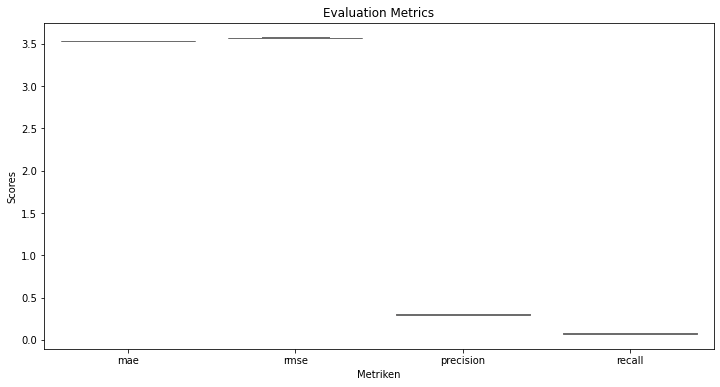

In [158]:
# Optimierung
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Funktion zur Erstellung der Ähnlichkeitsmatrix und Empfehlungen
def generate_recommendations(ratings, tags, user_id, max_features=15000, max_df=0.6, min_df=5, ngram_range=(1, 2), top_n=20):
    # Tags pro Film zusammenfassen
    tags_combined = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

    # TF-IDF-Vektorisierung mit benutzerdefinierten Parametern
    tfidf_vectorizer = TfidfVectorizer(
        max_features=max_features,
        max_df=max_df,
        min_df=min_df,
        ngram_range=ngram_range
    )
    tfidf_matrix = tfidf_vectorizer.fit_transform(tags_combined['tag'])

    # Ähnlichkeitsmatrix berechnen
    cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Mapping von `movieId` zu Index in der Ähnlichkeitsmatrix
    movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(tags_combined['movieId'])}

    # Empfehlungen generieren
    def recommend_movies(user_id, ratings, cosine_similarities, movie_id_to_index, top_n=20):
        # Filme finden, die der Benutzer bereits bewertet hat
        user_movies = ratings[ratings['userId'] == user_id]['movieId']
        all_recommendations = []

        for movie_id in user_movies:
            if movie_id in movie_id_to_index:
                cosine_index = movie_id_to_index[movie_id]
                sim_scores = list(enumerate(cosine_similarities[cosine_index]))
                sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
                sim_scores = sim_scores[1:top_n + 1]
                all_recommendations.extend([tags_combined['movieId'][i[0]] for i in sim_scores])

        # Zähle die Häufigkeit jedes empfohlenen Films
        recommendation_counts = Counter(all_recommendations)

        # Sortiere nach Häufigkeit und Anzahl
        most_common_recommendations = [movie for movie, _ in recommendation_counts.most_common(top_n)]
        return most_common_recommendations[:20]

    # Generieren Sie die Empfehlungen mit den neuen Parametern
    recommended_movie_ids = recommend_movies(user_id, ratings, cosine_similarities, movie_id_to_index, top_n)

    return recommended_movie_ids

# Beispiel: Hyperparameter festlegen und Empfehlungen für Benutzer 2 generieren
user_id = 2
recommended_movie_ids = generate_recommendations(
    ratings=ratings, tags=tags, user_id=user_id,
    max_features=8000, max_df=0.75, min_df=3, ngram_range=(1, 2), top_n=15
)

# Zeigen Sie die Liste der Filme mit ihren Titeln an
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]

# Create the RecommenderEvaluator object
user_item_matrix_np= np.array(user_item_matrix) # Weil VS Code sonst Probleme macht
evaluator = RecommenderEvaluator(user_item_matrix_np, metrics=["mae", "rmse", "precision", "recall"])

# Evaluate the recommendations for multiple iterations
evaluator.evaluation_loop()

# Print the average results
print("Durchschnittliche Ergebnisse:")
for metric, scores in evaluator.results.items():
    print(f"{metric}: {np.mean(scores):.4f}")

# Visualize the results (optional)
evaluator.plot_results()

*Diskussion zum Plot*: Ich habe die Parameter mit verschiedenen Zahlen getestet und die Werte verändern sich kaum. 

Durchschnittliche Ergebnisse:
mae: 3.3726
rmse: 3.5862
precision: 0.5000
recall: 0.5000


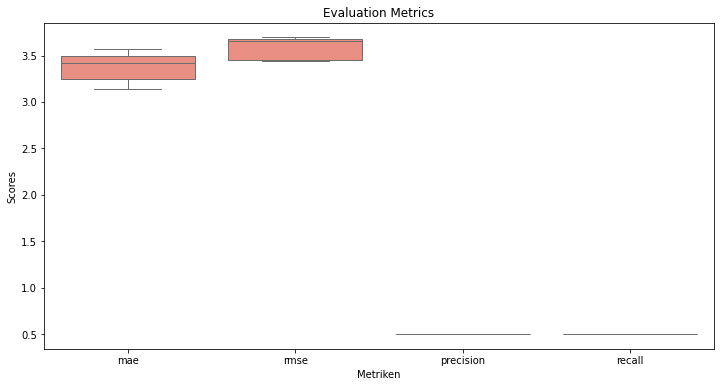

In [159]:
# Metriken für die kleinere Matrix
smaller_matrix_np= np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
evaluator = RecommenderEvaluator(smaller_matrix_np, metrics=["mae", "rmse", "precision", "recall"])
evaluator.evaluation_loop()

print("Durchschnittliche Ergebnisse:")
for metric, scores in evaluator.results.items():
    print(f"{metric}: {np.mean(scores):.4f}")

# Plot
evaluator.plot_results()

Erklärung: Dieses RS habe ich hier auf Github gefunden und mit Hilfe von ChatGPT nachgebaut: https://github.com/Pyul/Yelp-Dataset-Challenge
Zuerst werden alle Tags von jedem Film zu einem einzigen Textblock gemacht. Danach wird mit TF-IDF die Wichtigkeit der Wörter berechnet. Also Wörter, wie häufig vorkommen, werden als wichtig eingestuft. Wörter, die in allen Filmen sehr selten vorkommen, werden als aussagekräftig eingestuft. Diese Wichtigkeiten werden mit Zahlen festgehalten und daraus wird eine Matrix erstellt. Dann wird die Ähnlichkeit zwischen zwei Vektoren in der Matrix berechnet indem sie normalisiert wird und dann geschaut wird, welche orthogonal zueinander stehen und welche nicht. Dann wird bei zwei ähnlichen Usern geschaut, welche dieser ähnlichen Filme hat der Nutzer noch nicht gesehen? Die werden dann empfohlen. 

In [160]:
# Second method: Deep learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model

# Mapping der Benutzer- und Film-IDs in aufeinanderfolgende Integer-Werte
user_mapping = {id: idx for idx, id in enumerate(ratings['userId'].unique())}
movie_mapping = {id: idx for idx, id in enumerate(ratings['movieId'].unique())}

# Anwendung des Mappings auf das Ratings-DataFrame
ratings['user_encoded'] = ratings['userId'].map(user_mapping)
ratings['movie_encoded'] = ratings['movieId'].map(movie_mapping)

# Bestimmung der Anzahl von Benutzern und Filmen für das Embedding
num_users = len(user_mapping)
num_movies = len(movie_mapping)

# Eingaben und Labels definieren
X_users = ratings['user_encoded'].values
X_movies = ratings['movie_encoded'].values
y_ratings = ratings['rating'].values

# Train-Test-Split
X_users_train, X_users_test, X_movies_train, X_movies_test, y_train, y_test = train_test_split(
    X_users, X_movies, y_ratings, test_size=0.2, random_state=42
)

# Embedding-Grösse (wählen Sie eine passende Grösse)
embedding_size = 50

# Benutzer- und Film-IDs als Eingaben
user_input = Input(shape=(1,), name='User')
movie_input = Input(shape=(1,), name='Movie')

# Embeddings für Benutzer und Filme
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, name='User-Embedding')(user_input)
movie_embedding = Embedding(input_dim=num_movies, output_dim=embedding_size, name='Movie-Embedding')(movie_input)

# Flattieren der Embeddings
user_vector = Flatten()(user_embedding)
movie_vector = Flatten()(movie_embedding)

# Kombinieren der Embeddings
concat = Concatenate()([user_vector, movie_vector])

# Dichte Schicht
dense = Dense(128, activation='relu')(concat)
dropout = Dropout(0.3)(dense)
output = Dense(1)(dropout)  # Ausgabe-Schicht für die Bewertungsvorhersage

# Modell erstellen
model = Model(inputs=[user_input, movie_input], outputs=output)

# Kompilieren des Modells
model.compile(optimizer='adam', loss='mean_squared_error')

# Ausgabe des Modells anzeigen
model.summary()

# Modelltraining mit den echten Daten
model.fit([X_users_train, X_movies_train], y_train, epochs=5, batch_size=64, validation_data=([X_users_test, X_movies_test], y_test))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ User (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Movie (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Embedding      │ (None, 1, 50)     │     30,500 │ User[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Movie-Embedding     │ (None, 1, 50)     │    486,200 │ Movie[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ User-Embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ Movie-Embedding[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 529,757 (2.02 MB)

 Trainable params: 529,757 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 2.9525 - val_loss: 0.8037
Epoch 2/5
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.7870 - val_loss: 0.7874
Epoch 3/5
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.7513 - val_loss: 0.7764
Epoch 4/5
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.7186 - val_loss: 0.7654
Epoch 5/5
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.6885 - val_loss: 0.7605


In [161]:
def recommend_for_user(user_id, num_recommendations=10):
    # Überprüfen, ob der Benutzer in den Mapping-IDs existiert
    if user_id not in user_mapping:
        raise ValueError("User ID nicht gefunden")
    
    # Mapping des Benutzer-IDs auf den Encoder-Wert
    user_encoded = user_mapping[user_id]
    
    # Generiere eine Liste aller Filme und ihrer Encoded IDs
    all_movies = np.array(list(movie_mapping.values()))
    all_movies_expanded = np.repeat(user_encoded, len(all_movies))
    
    # Vorhersagen für alle Filme für den Benutzer erstellen
    predictions = model.predict([all_movies_expanded, all_movies], batch_size=64)
    predictions = predictions.flatten()
    
    # Sortieren Sie nach vorhergesagter Bewertung, absteigend
    recommended_movie_indices = np.argsort(-predictions)[:num_recommendations]
    
    # Finde die ursprünglichen Movie-IDs für diese Indizes
    recommended_movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(i)] for i in recommended_movie_indices]
    
    # Finde die Titel der empfohlenen Filme
    recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
    
    return recommended_movies[['movieId', 'title']]

# Beispiel: Empfehlen Sie 10 Filme für Benutzer mit ID 1
user_id = 1
recommendations = recommend_for_user(user_id, num_recommendations=10)
print(recommendations)

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
      movieId                                              title
687       905                              It Happened One Night
841      1104                          Streetcar Named Desire, A
918      1217                                                Ran
1762     2360                          Celebration, The (Festen)
3505     4789                            Phantom of the Paradise
4396     6460                            Trial, The (Procès, Le)
5580    26810                                      Bad Boy Bubby
7252    74282  Anne of Green Gables: The Sequel (a.k.a. Anne ...
9514   171495                                             Cosmos
9618   177593          Three Billboards Outside Ebbing, Missouri


Durchschnittliche Ergebnisse:
mae: 3.3210
rmse: 3.5496
recall: 0.5000
precision: 0.5000


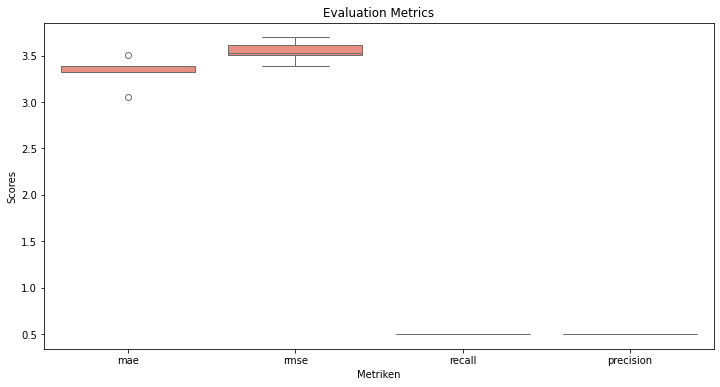

In [162]:
# Metriken berechnen für die kleinere Matrix
smaller_matrix_np= np.array(smaller_matrix) # Weil VS Code sonst Probleme macht
evaluator = RecommenderEvaluator(smaller_matrix_np, metrics=["mae", "rmse", "recall", "precision"])
evaluator.evaluation_loop()

print("Durchschnittliche Ergebnisse:")
for metric, scores in evaluator.results.items():
    print(f"{metric}: {np.mean(scores):.4f}")

# Plot
evaluator.plot_results()

Durchschnittliche Ergebnisse:
mae: 3.5298
rmse: 3.5690
recall: 0.0761
precision: 0.3064


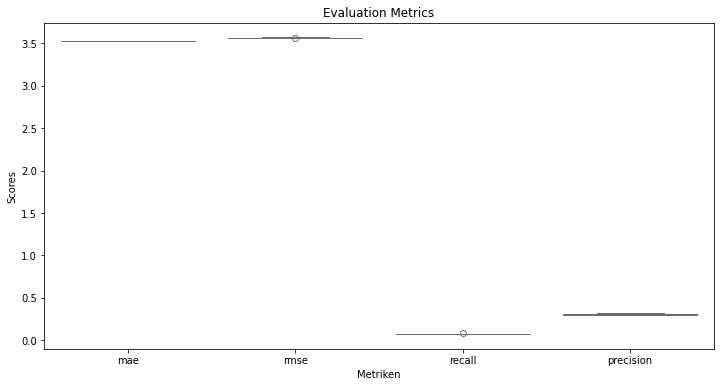

In [163]:
# Metriken berechnen für die grosse Matrix
user_item_matrix_np= np.array(user_item_matrix) # Weil VS Code sonst Probleme macht
evaluator = RecommenderEvaluator(user_item_matrix_np, metrics=["mae", "rmse", "recall", "precision"])
evaluator.evaluation_loop()

print("Durchschnittliche Ergebnisse:")
for metric, scores in evaluator.results.items():
    print(f"{metric}: {np.mean(scores):.4f}")

# Plot
evaluator.plot_results()

Da ich noch nie mit Deep Learning gearbeitet habe, wollte ich wissen, wie das funktioniert. Ich habe den Code von ChatGPT und mir auch von ChatGPT erklären lassen, wie das funktioniert. Ich beschreibe jetzt in eigenen Worten, wie das Modell funktioniert. Dieser Code baut ein Deep Learning-Modell, das die Filmbewertungen vorhersagt. Zuerst nehmen wir die IDs der Benutzer und Filme und übersetzen sie in eine fortlaufende Nummerierung, damit der Computer sie besser verarbeiten kann. Dann teilen wir die Daten in zwei Teile auf: einen Teil zum Trainieren des Modells und einen Teil zum Testen, um zu sehen, wie gut es funktioniert. Anschliessend erstellen wir sogenannte Embeddings, das sind wie Mini-Profile für jeden Benutzer und Film. Diese Profile sind eigentlich nur Listen von Zahlen, die versteckte Eigenschaften darstellen, wie etwa mag Actionfilme oder gibt oft hohe Bewertungen. Die Profile für die Benutzer und Filme werden geflattet, also zu einer langen Reihe von Zahlen gemacht. Nach der Erstellung wird das Modell mit einem sogenannten Adam-Optimierer trainiert, was bedeutet, dass es Schritt für Schritt lernt, Vorhersagen genauer zu machen. Man arbeitet mit dem MSE, die dem Modell sagt, wie weit die Vorhersagen von den echten Bewertungen entfernt sind.
Am Ende lassen wir das Modell fünf Mal durch die Daten laufen und nutzen eine Batch-Grösse von 64, was bedeutet, dass immer 64 Datensätze gleichzeitig verarbeitet werden. Ziel des Modells ist es, die Bewertungen, die ein Benutzer für einen Film abgeben würde, genau vorherzusagen, basierend auf den Bewertungen von ähnlichen Filme.

In [164]:
# Third method: NLP
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Kombinieren Sie Titel, Genres und Tags für jeden Film
tags_combined = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()
movies_combined = pd.merge(movies, tags_combined, on='movieId', how='left').fillna('')

# Kombinieren Sie relevante Textinformationen
movies_combined['description'] = movies_combined['title'] + ' ' + movies_combined['genres'] + ' ' + movies_combined['tag']

# Initialisieren Sie das BERT-Modell und den Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenisieren und berechnen Sie die BERT-Embeddings
def get_bert_embedding(text):
    tokens = tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
    with torch.no_grad():
        output = model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

# Berechnen Sie die BERT-Embeddings für jeden Film
movie_embeddings = []
for description in movies_combined['description']:
    movie_embeddings.append(get_bert_embedding(description))

# Konvertieren Sie die Embeddings in ein numpy-Array
import numpy as np
movie_embeddings = np.array(movie_embeddings)

# Berechnen Sie die Cosine-Similarity-Matrix
cosine_similarities = cosine_similarity(movie_embeddings)

# Mapping von `movieId` zu Index in der Ähnlichkeitsmatrix
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(movies_combined['movieId'])}

# Funktion zum Empfehlen ähnlicher Filme
def recommend_movies(user_id, ratings, cosine_similarities, movie_id_to_index, top_n=10):
    user_movies = ratings[ratings['userId'] == user_id]['movieId']
    all_recommendations = []

    for movie_id in user_movies:
        if movie_id in movie_id_to_index:
            cosine_index = movie_id_to_index[movie_id]
            sim_scores = list(enumerate(cosine_similarities[cosine_index]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:top_n + 1]
            all_recommendations.extend([movies_combined['movieId'][i[0]] for i in sim_scores])

    # Zähle die Häufigkeit jedes empfohlenen Films
    from collections import Counter
    recommendation_counts = Counter(all_recommendations)

    # Sortiere nach Häufigkeit und Anzahl
    most_common_recommendations = [movie for movie, _ in recommendation_counts.most_common(top_n)]
    return most_common_recommendations[:top_n]

# Beispiel: Empfehlen Sie 10 Filme für Benutzer 2
user_id = 2
recommended_movie_ids = recommend_movies(user_id, ratings, cosine_similarities, movie_id_to_index, top_n=10)

# Zeigen Sie die Liste der Filme mit ihren Titeln an
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
print(f"Empfohlene Filme für Benutzer {user_id}:\n", recommended_movies[['title']])


c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
print(tags)

      userId  movieId               tag           timestamp
0          2    60756             funny 2015-10-24 19:29:54
1          2    60756   Highly quotable 2015-10-24 19:29:56
2          2    60756      will ferrell 2015-10-24 19:29:52
3          2    89774      Boxing story 2015-10-24 19:33:27
4          2    89774               MMA 2015-10-24 19:33:20
...      ...      ...               ...                 ...
3678     606     7382         for katie 2007-02-11 22:46:59
3679     606     7936           austere 2007-03-08 22:18:54
3680     610     3265            gun fu 2017-05-03 20:39:44
3681     610     3265  heroic bloodshed 2017-05-03 20:39:38
3682     610   168248  Heroic Bloodshed 2017-05-03 20:44:30

[3683 rows x 4 columns]


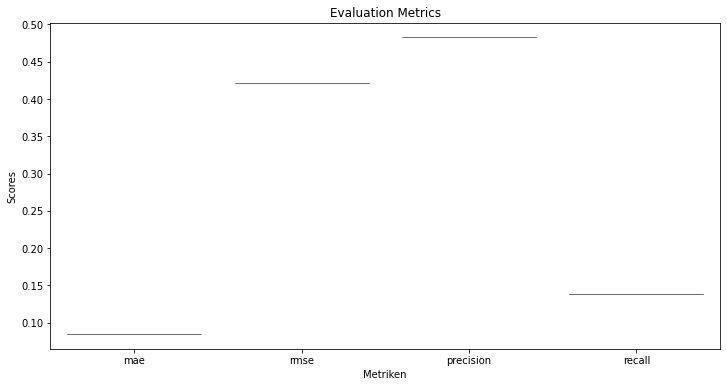

In [ ]:
# Method 4: NMF (haben wir in ALA kurz angeschaut, als wir SVD behandelt haben, daher mit Hilfe von ChatGPT gemacht)
from sklearn.decomposition import NMF

# Erstellen Sie die Benutzer-Item-Matrix
user_item_matrix = ratings.pivot(index='user_encoded', columns='movie_encoded', values='rating').fillna(0)

# Initialize the evaluator
evaluator = RecommenderEvaluator(matrix=user_item_matrix.values, metrics=['mae', 'rmse', 'precision', 'recall'], num_iterations=1, test_ratio=0.2)

# NMF-Konfiguration
n_components = 20
nmf = NMF(n_components=n_components, init='random', random_state=42)

# Train-Test-Split mit Maskierung
mask = np.random.rand(*user_item_matrix.shape) < evaluator.test_ratio
train_matrix = user_item_matrix.copy()
train_matrix[mask] = 0

# Trainiere das NMF-Modell
W = nmf.fit_transform(train_matrix)
H = nmf.components_

# Erstelle Vorhersagematrix
predicted_matrix = np.dot(W, H)

# Evaluiere alle Metriken mit der neuen `evaluate_predictions`-Methode
evaluator.evaluate_predictions(predicted_matrix, mask)

# Ergebnisse anzeigen
evaluator.plot_results()

In [ ]:
# Als nächstes möchte ich die Hyperparameter also die n_components optimieren, mein Laptop konnte das nicht machen, aber der Code funktioniert.
user_item_matrix = ratings.pivot(index='user_encoded', columns='movie_encoded', values='rating').fillna(0)

# Initialize the evaluator
evaluator = RecommenderEvaluator(matrix=user_item_matrix.values, metrics=['rmse'], num_iterations=1, test_ratio=0.2)

# Hyperparameter-Optimierung: Verschiedene Werte für `n_components`
n_components_range = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
results = {'n_components': [], 'rmse': []}

# Schleife zur Optimierung über `n_components`
for n_components in n_components_range:
    # Train-Test-Split mit Maskierung
    mask = np.random.rand(*user_item_matrix.shape) < evaluator.test_ratio
    train_matrix = user_item_matrix.copy()
    train_matrix[mask] = 0

    # NMF-Modell trainieren
    nmf = NMF(n_components=n_components, init='random', random_state=42)
    W = nmf.fit_transform(train_matrix)
    H = nmf.components_

    # Vorhersagematrix erstellen
    predicted_matrix = np.dot(W, H)

    # RMSE für die Vorhersagen berechnen
    evaluator.evaluate_predictions(predicted_matrix, mask)
    rmse = np.mean(evaluator.results['rmse'])

    # Ergebnisse speichern
    results['n_components'].append(n_components)
    results['rmse'].append(rmse)

# Optimale Anzahl der Komponenten finden
best_n_components = results['n_components'][np.argmin(results['rmse'])]
best_rmse = min(results['rmse'])

# Ergebnisse plotten
plt.figure(figsize=(8, 5))
plt.plot(results['n_components'], results['rmse'], marker='o', linestyle='-', color='blue')
plt.xlabel('Anzahl der Komponenten')
plt.ylabel('RMSE')
plt.title('Optimierung der Anzahl der Komponenten für NMF')
plt.grid(True)
plt.show()

print(f'Optimale Anzahl der Komponenten: {best_n_components} mit RMSE: {best_rmse:.4f}')

c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1710: 

KeyboardInterrupt: 

### Exercise 10 - Compare all RS that you build in this challenge (6 points)
Compile a table with the performance metrics of exercise 3 for all RS from this MC (Make sure to include also the baseline RS). Also generate comparative plots. Discuss.

Weil mein Laptop abgestürzt ist, vergleiche ich hier die Ergebnisse der kleineren Matrix namens smaller_matrix. 

In [ ]:
table = pd.DataFrame.from_dict(
    orient="index",
    columns=["MAE", "RMSE", "Recall@15", "Precision@15"],
    data={
        "Baseline Predictor": [3.2378, 3.4871, 0.5000, 0.5000],
        "Random Recommendations": [3.2803, 3.5296, 0.5000, 0.5000], 
        "Similar items cosine": [0.3342, 0.5781, 0.5000, 0.1000],
        "Similar items pearson": [0.9145, 0.9739, 0.5000, 0.1000],
        "Similar users cosine": [1.568, 1.7836, 0.5000, 0.1000], 
        "Similar users pearson": [1.328, 1.5951, 0.5000, 0.1000],
        "SVD": [0.5841, 1.0794, 0.5000, 0.5000], 
        "TfidfVectorizer": [3.5280, 3.6779, 0.5000, 0.5000],
        "Deep learning model": [3.3160, 3.5035, 0.5000, 0.5000]
    },
)
table

,MAE,RMSE,Recall@15,Precision@15
Baseline Predictor,3.2378,3.4871,0.5,0.5
Random Recommendations,3.2803,3.5296,0.5,0.5
Similar items cosine,0.3342,0.5781,0.5,0.1
Similar items pearson,0.9145,0.9739,0.5,0.1
Similar users cosine,1.5680,1.7836,0.5,0.1
Similar users pearson,1.3280,1.5951,0.5,0.1
SVD,0.5841,1.0794,0.5,0.5
TfidfVectorizer,3.5280,3.6779,0.5,0.5
Deep learning model,3.3160,3.5035,0.5,0.5


C:\Users\chant\AppData\Local\Temp/ipykernel_9640/77946581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table.index, y=table[metric], ax=axes[i // 2][i % 2], palette=custom_palette)
C:\Users\chant\AppData\Local\Temp/ipykernel_9640/77946581.py:9: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=table.index, y=table[metric], ax=axes[i // 2][i % 2], palette=custom_palette)
C:\Users\chant\AppData\Local\Temp/ipykernel_9640/77946581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table.index, y=table[metric], ax=axes[i // 2][i % 2], palette=custom_palette)
C:\Users\chant\AppData\Local\Temp

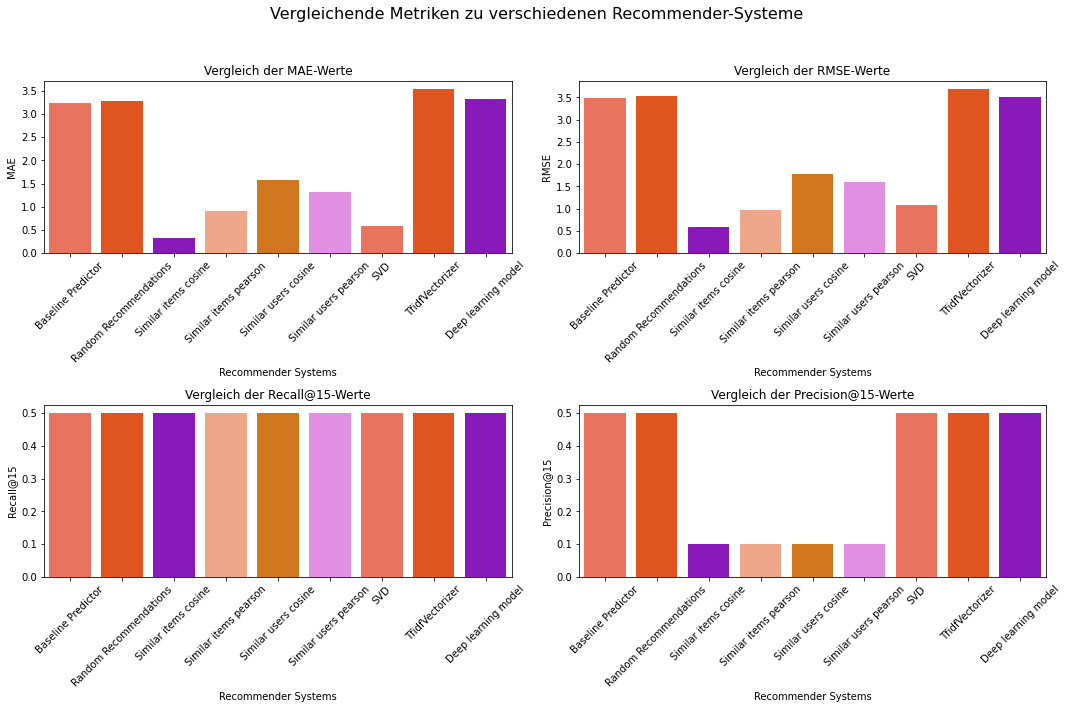

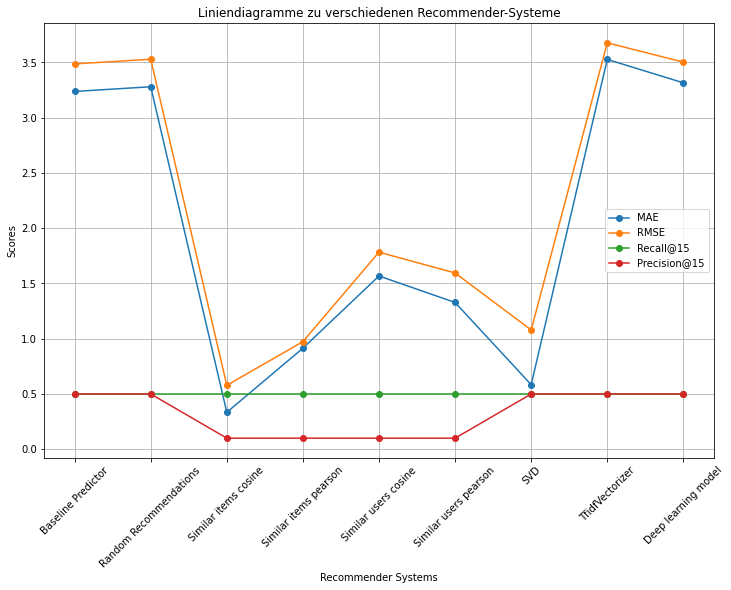

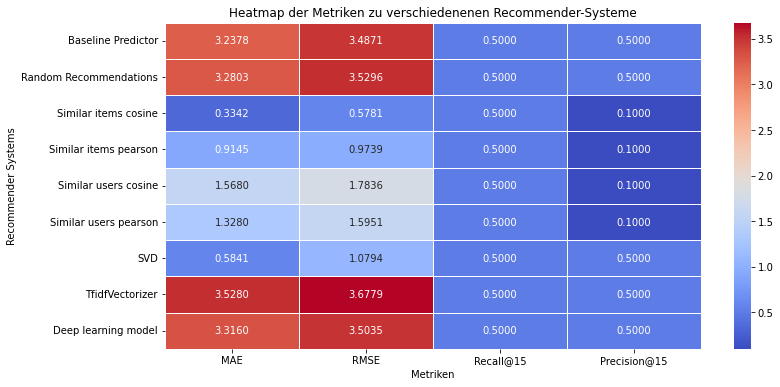

In [ ]:
# Farben
custom_palette = sns.color_palette(["#FF6347", "#FF4500", "#9400D3", "#FFA07A", "#EE7600", "#EE82EE"])

# Barplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Vergleichende Metriken zu verschiedenen Recommender-Systeme', fontsize=16)

for i, metric in enumerate(metric_labels):
    sns.barplot(x=table.index, y=table[metric], ax=axes[i // 2][i % 2], palette=custom_palette)
    axes[i // 2][i % 2].set_title(f'Vergleich der {metric}-Werte')
    axes[i // 2][i % 2].set_ylabel(metric)
    axes[i // 2][i % 2].set_xlabel('Recommender Systems')
    axes[i // 2][i % 2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Linienplot
plt.figure(figsize=(12, 8))
for metric in metric_labels:
    plt.plot(table.index, table[metric], marker='o', label=metric)

plt.title('Liniendiagramme zu verschiedenen Recommender-Systeme')
plt.xlabel('Recommender Systems')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(table, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Heatmap der Metriken zu verschiedenenen Recommender-Systeme')
plt.xlabel('Metriken')
plt.ylabel('Recommender Systems')
plt.show()

*Diskussion der Plots*: Ich konnte hier nur die Empfehlungen auf die kleinere Matrix machen, da mein Computer bei der ursprünglichen Matrix immer wieder abgestürzt ist. Daher erstaunt es mich nicht, dass die SVD am besten abschneidet, da sie auf besonders sparse Matrizen ausgelegt ist. Bei den Deep Learning Modellen müsste ich mich noch weiter einlesen, um herauszufinden, wie ich sie optimieren kann. Was ich erstaunlich finde, ist, dass Similar Items Cosine auch sehr gut abschneidet, aber das liegt daran, dass die kleinere Matrix sehr sparse ist. Mein Fazit: Mit kleineren Matrizen, die wenig Informationen haben, funktionieren SVD und Similar Items Cosine am besten. Vermutlich würden die Deep Learning Modelle besser abschneiden, wenn ich sie auf die richtige Matrix loslassen würde. 

### Exercise 11 - Risks of RS on user or society (5 points)
In this exercise we take one step back from the technical aspects of RS.
Positive effects of good recommendations are easy to imagine: Happy customers and successful companies. However  also come with potential risks. Which risks for the user or society can you imagine or discover online? Pick one risk and describe what you would do to mitigate this problem.

Bei dieser Frage muss ich kurz ein bisschen ausholen. Ich habe früher als Journalistin gearbeitet, unter anderem bei 20 Minuten. Dort bin ich zum ersten Mal richtig mit der Gruppe "Junge Tat" in Berührung gekommen und durfte mit einem ehemaligen Mitglied sprechen. Daraus ergab sich schliesslich nur ein Interview mit einem Experten, das publiziert worden ist. Aber ich konnte mit diesem ehemaligen Mitglied offen reden und habe ihn natürlich auch gefragt, wie man denn als normaler Schweizer mit guter Bildung (er hat eine Lehre gemacht und hat einen festen Job) da hineinrutscht. Er sagte mir, dass der Youtube-Algorithmus da eine grosse Rolle gespielt hat (Tiktok gabs damals nicht, aber ich bin überzeugt, dort ist es ähnlich). Er hat sich immer schon für den 2. Weltkrieg interessiert, einfach aus Neugierde. Da hat er immer wieder Dokumentationen geschaut und auf Youtube werden durch Recommender Systems ähnliche Videos empfohlen. Er sagte, irgendwann sei er da auf Videos gestossen darüber, was unter dem Nazi-Regime nicht schlecht war. So erklärte er mir, dass beispielsweise die Experimente von Josef Mengele der Medizin viel gebracht hätten und solche Sachen. Er sagte, dass ungefähr ab da wurden ihm immer mal wieder Videos vorgeschlagen, die das NS-Regime verherrlichen bis er nur noch solche Videos im Feed hatte. Plötzlich wurden ihm da auch Gruppen zu diesem Thema auf Reddit vorgeschlagen, die er irgendwann aus Neugier besuchte. Nach und nach landete er durch diese Empfehlungen in der ganz rechten Ecke, wo der 2. Weltkrieg verherrlicht wurde und auf Reddit wurde er von Gleichgesinnten angeschrieben und landete bald in einer Facebookgruppe und so dann irgendwann in der Jungen Tat. Er glaubte der ganzen Propaganda und dachte, er sei auf dem richtigen Weg. 

Warum ich das erzähle? Weil aus meiner Sicht genau diese sogenannten Bubbles ein Problem darstellen. Es werden nur ähnliche Videos vorgeschlagen bis man irgendwo in einer Nische des Internets landet und sich so auch seine Meinung bildet. Vor allem in Zeiten von Rechtsextremismus und russischer Propaganda ist das aus meiner Sicht ein grosses und schwerwiegendes Problem. 

Ich würde das, wenn ich könnte, auf drei Arten angehen:

- Bildung: Die junge Generation muss lernen, was eine Bubble ist und was die Gefahren sind. 
- Algorithmus anpassen: Der Algorithmus sollte nicht nur ähnliche Inhalte vorschlagen, sondern auch mal neue, auch wenn die dem User nicht gefallen könnten. Allerdings liegt hier das Problem, dass der User das nicht anklickt. 
- Kontrolle der Items: Man sollte die Items, die hochgeladen werden, kontrollieren und solche, die Fake News oder gefährliche Ansichten verbreiten, entfernen. Das sollte eine unabhängige Kommission beschliessen, was gefährlich ist und was nicht. 

**Read the Guidelines for Implementation and Submission one more time.**